In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Load datasets

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

<ipython-input-3-525dda771c74>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('train.csv')


In [4]:
print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)

Train Data Shape: (46618, 64)
Test Data Shape: (4970, 63)


Data Preparation

In [5]:
df_cleaned = train_data.copy()
df_cleaned_test = test_data.copy()

Check for missing values

In [6]:
missing_data = df_cleaned.isnull().sum()
print("Missing Values Before Handling:\n", missing_data[missing_data > 0])

Missing Values Before Handling:
 yr                       292
ht                        64
num                     4679
Rec_Rank               32281
ast_tov                 3467
rimmade                 5758
rimmade_rimmiss         5758
midmade                 5758
midmade_midmiss         5758
rim_ratio               8499
mid_ratio               8568
dunksmade               5758
dunksmiss_dunksmade     5758
dunks_ratio            26218
pick                   45411
drtg                      42
adrtg                     42
dporpag                   42
stops                     42
bpm                       42
obpm                      42
dbpm                      42
gbpm                      42
mp                        36
ogbpm                     42
dgbpm                     42
oreb                      36
dreb                      36
treb                      36
ast                       36
stl                       36
blk                       36
pts                       36
dtype: int

Dropping columns with maximum missing values

In [7]:
cols_to_drop = [
    'Rec_Rank', 'ast_tov', 'rimmade', 'rimmade_rimmiss', 'midmade',
    'midmade_midmiss', 'rim_ratio', 'mid_ratio', 'dunksmade', 'dunksmiss_dunksmade',
    'dunks_ratio'
]

In [8]:
df_cleaned.drop(columns=cols_to_drop, inplace=True, errors='ignore')

In [9]:
df_cleaned_test.drop(columns=cols_to_drop, inplace=True, errors='ignore')

Ensure columns are consistent between train and test


In [10]:
common_columns = df_cleaned.columns.intersection(df_cleaned_test.columns).tolist()

In [11]:
common_columns

['team',
 'conf',
 'GP',
 'Min_per',
 'Ortg',
 'usg',
 'eFG',
 'TS_per',
 'ORB_per',
 'DRB_per',
 'AST_per',
 'TO_per',
 'FTM',
 'FTA',
 'FT_per',
 'twoPM',
 'twoPA',
 'twoP_per',
 'TPM',
 'TPA',
 'TP_per',
 'blk_per',
 'stl_per',
 'ftr',
 'yr',
 'ht',
 'num',
 'porpag',
 'adjoe',
 'pfr',
 'year',
 'type',
 'pick',
 'drtg',
 'adrtg',
 'dporpag',
 'stops',
 'bpm',
 'obpm',
 'dbpm',
 'gbpm',
 'mp',
 'ogbpm',
 'dgbpm',
 'oreb',
 'dreb',
 'treb',
 'ast',
 'stl',
 'blk',
 'pts',
 'player_id']

In [12]:
common_columns = [col for col in common_columns if col != 'player_id']

In [13]:
common_columns

['team',
 'conf',
 'GP',
 'Min_per',
 'Ortg',
 'usg',
 'eFG',
 'TS_per',
 'ORB_per',
 'DRB_per',
 'AST_per',
 'TO_per',
 'FTM',
 'FTA',
 'FT_per',
 'twoPM',
 'twoPA',
 'twoP_per',
 'TPM',
 'TPA',
 'TP_per',
 'blk_per',
 'stl_per',
 'ftr',
 'yr',
 'ht',
 'num',
 'porpag',
 'adjoe',
 'pfr',
 'year',
 'type',
 'pick',
 'drtg',
 'adrtg',
 'dporpag',
 'stops',
 'bpm',
 'obpm',
 'dbpm',
 'gbpm',
 'mp',
 'ogbpm',
 'dgbpm',
 'oreb',
 'dreb',
 'treb',
 'ast',
 'stl',
 'blk',
 'pts']

Define features

In [14]:
numerical_features = df_cleaned.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = df_cleaned.select_dtypes(include=['object']).columns.tolist()

Remove 'drafted' from features for prediction


In [15]:
numerical_features

['GP',
 'Min_per',
 'Ortg',
 'usg',
 'eFG',
 'TS_per',
 'ORB_per',
 'DRB_per',
 'AST_per',
 'TO_per',
 'FTM',
 'FTA',
 'FT_per',
 'twoPM',
 'twoPA',
 'twoP_per',
 'TPM',
 'TPA',
 'TP_per',
 'blk_per',
 'stl_per',
 'ftr',
 'porpag',
 'adjoe',
 'pfr',
 'year',
 'pick',
 'drtg',
 'adrtg',
 'dporpag',
 'stops',
 'bpm',
 'obpm',
 'dbpm',
 'gbpm',
 'mp',
 'ogbpm',
 'dgbpm',
 'oreb',
 'dreb',
 'treb',
 'ast',
 'stl',
 'blk',
 'pts',
 'drafted']

In [16]:
categorical_features

['team', 'conf', 'yr', 'ht', 'num', 'type', 'player_id']

In [17]:
numerical_features = [col for col in numerical_features if col != 'drafted']

In [18]:
categorical_features = [col for col in categorical_features if col != 'player_id']

Check if all specified columns exist in both DataFrames


In [19]:
missing_in_train = set(numerical_features + categorical_features) - set(df_cleaned.columns)
missing_in_test = set(numerical_features + categorical_features) - set(df_cleaned_test.columns)

In [20]:

print(f"Missing columns in training data: {missing_in_train}")
print(f"Missing columns in test data: {missing_in_test}")

Missing columns in training data: set()
Missing columns in test data: set()


Convert mixed-type columns to strings

In [21]:
for col in categorical_features:
    df_cleaned[col] = df_cleaned[col].astype(str)
    df_cleaned_test[col] = df_cleaned_test[col].astype(str)

Data Exploration

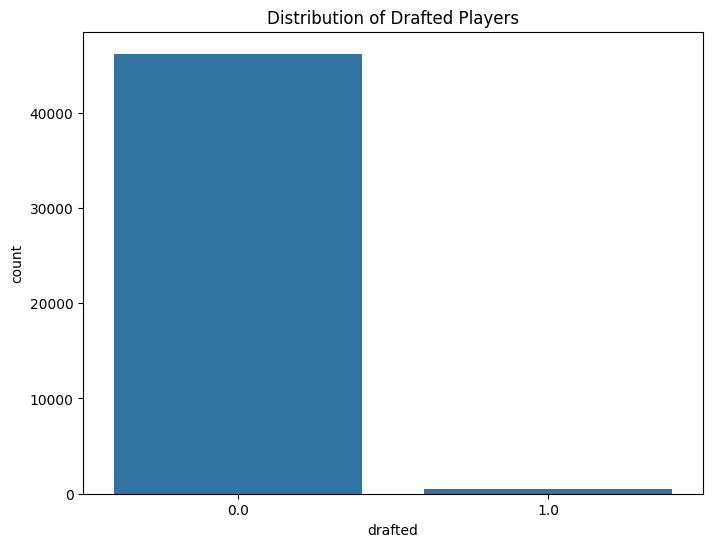

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x='drafted', data=df_cleaned)
plt.title('Distribution of Drafted Players')
plt.show()

Boxplots for Numerical Features (to identify outliers)

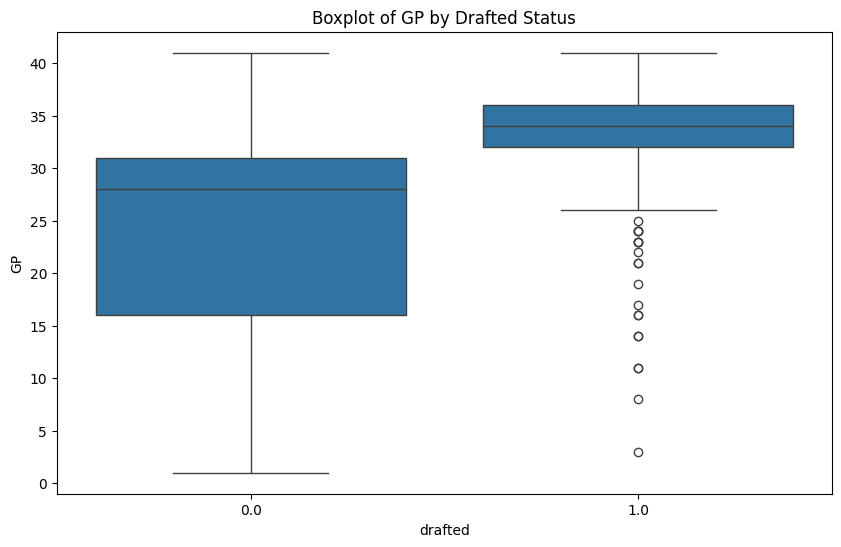

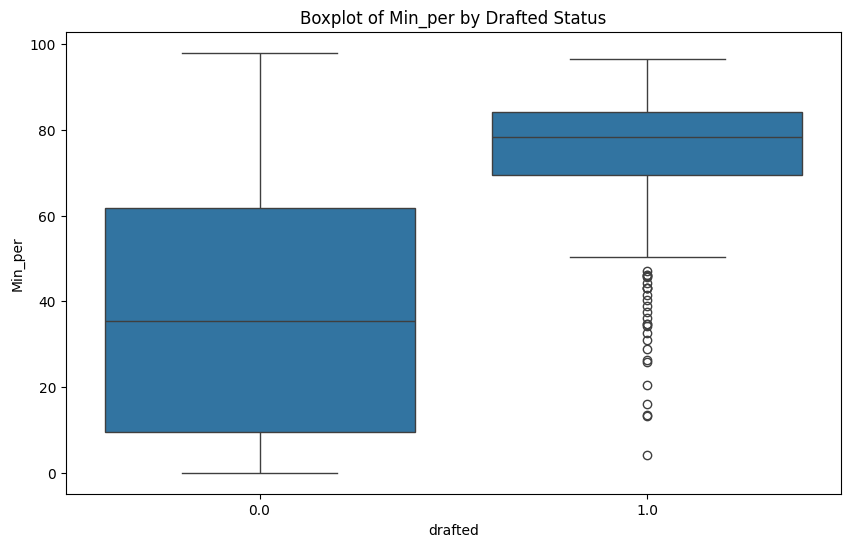

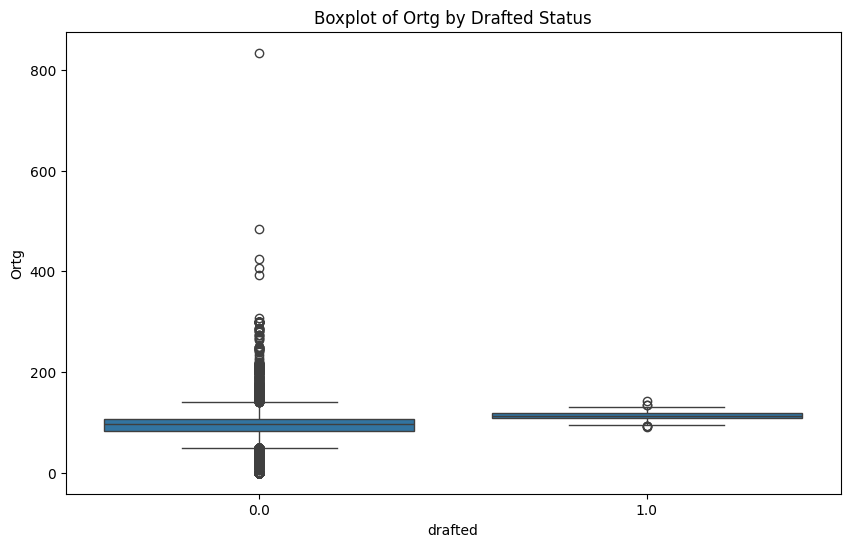

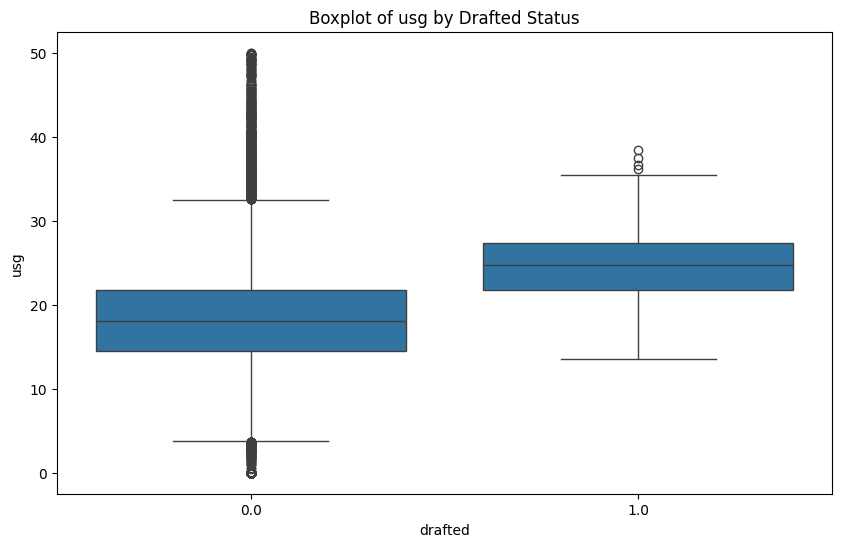

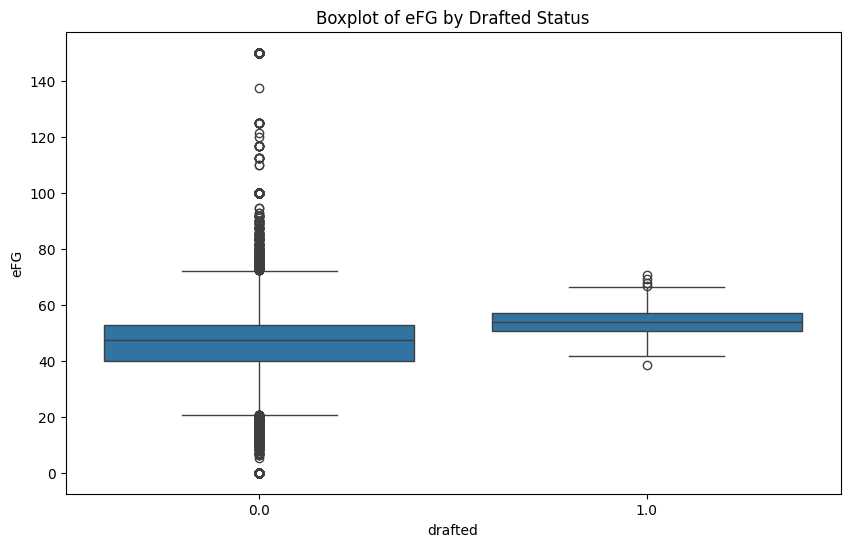

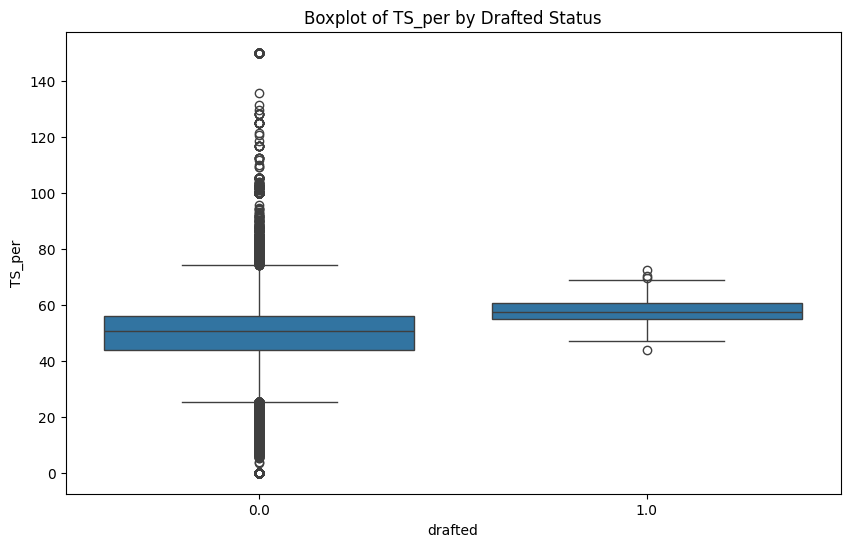

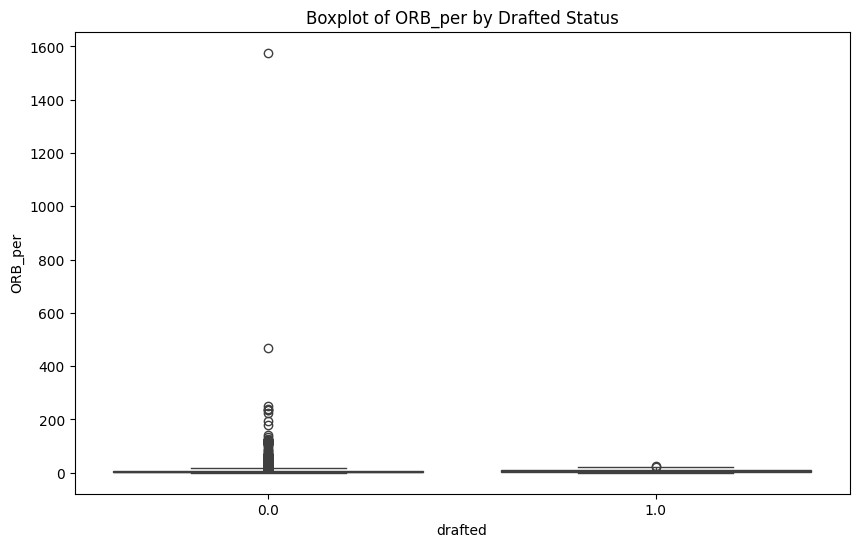

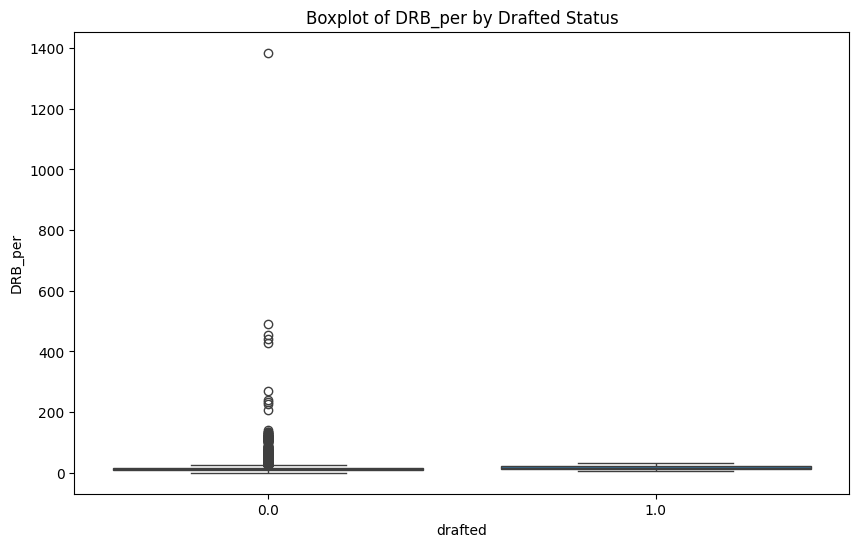

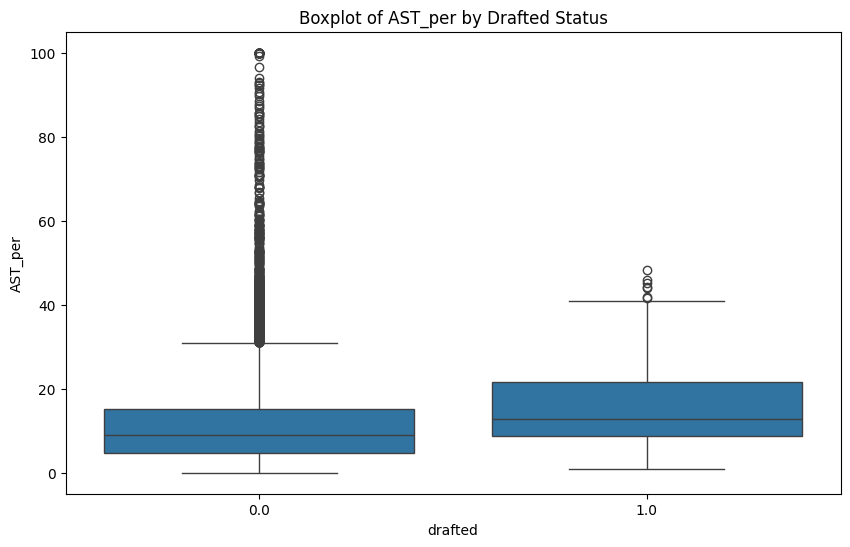

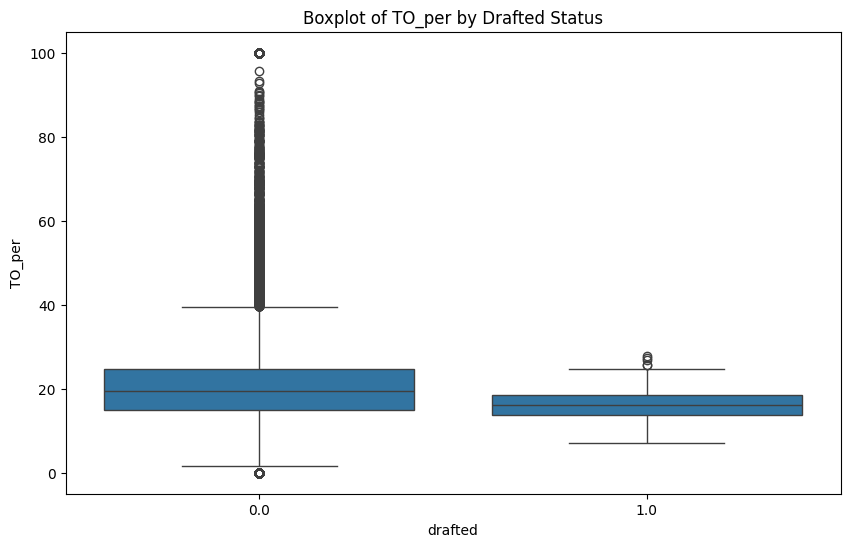

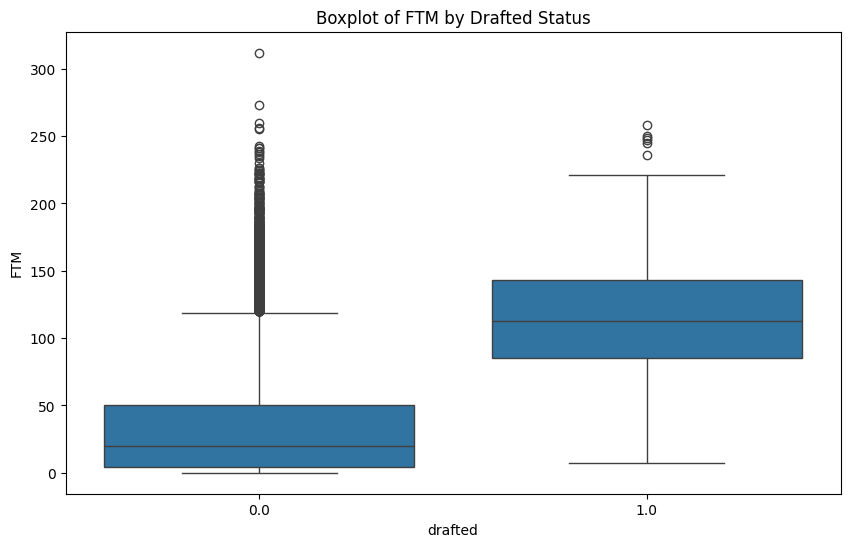

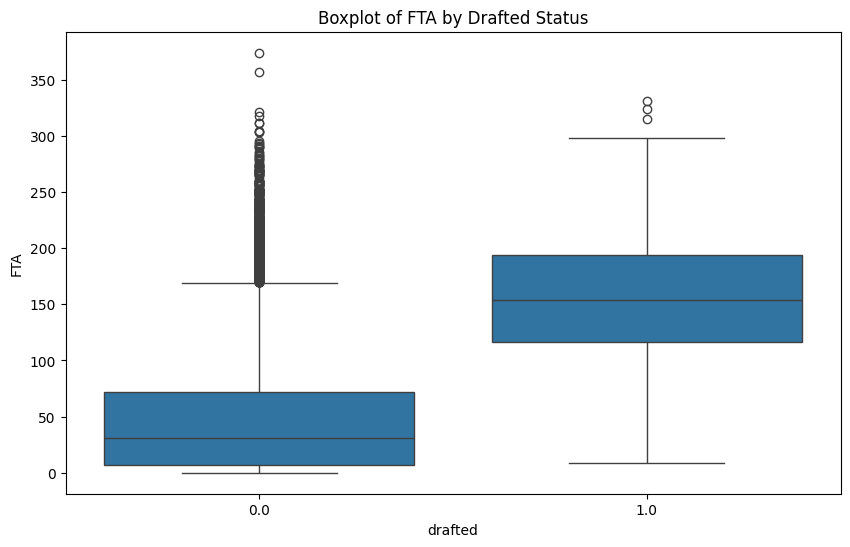

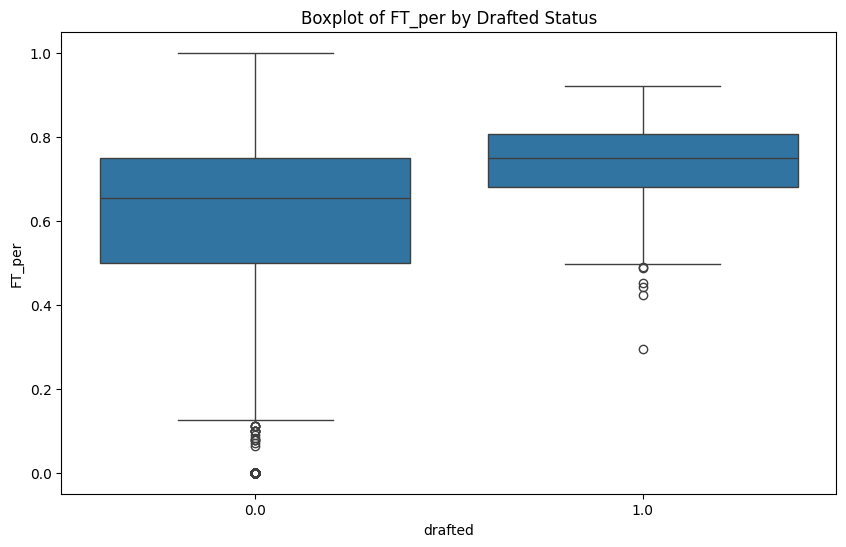

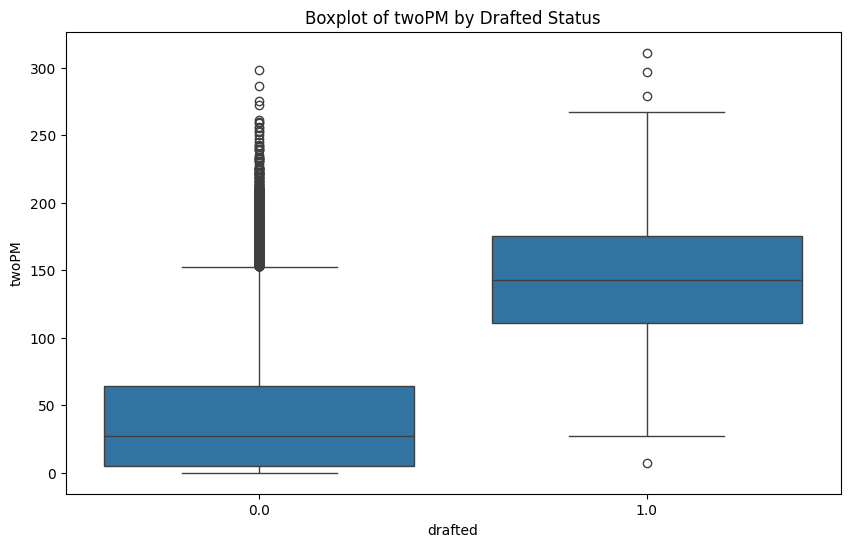

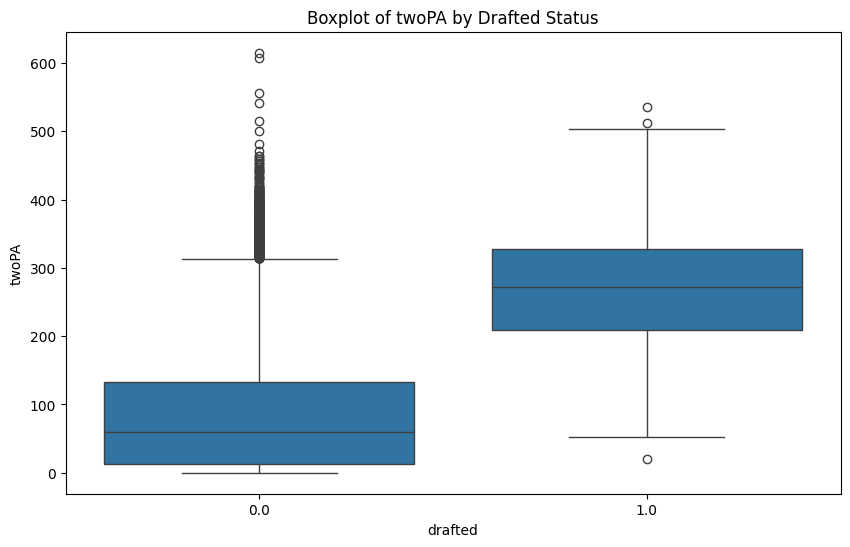

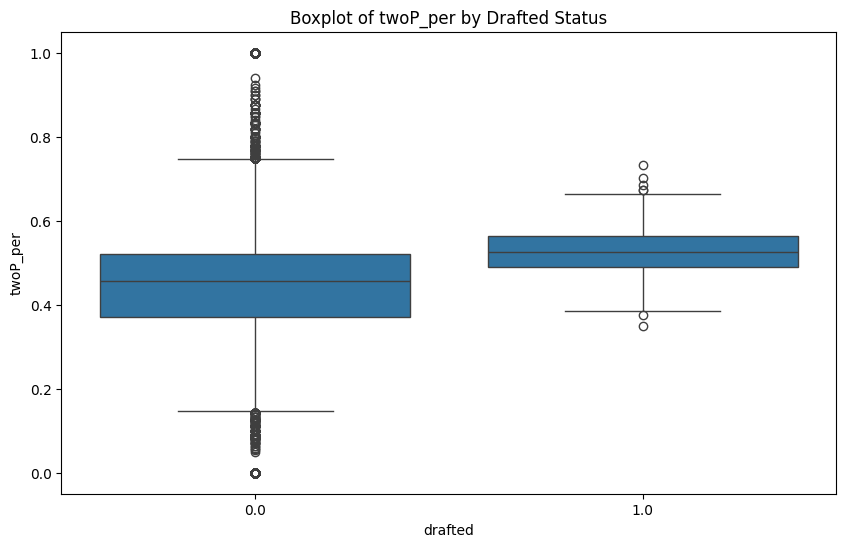

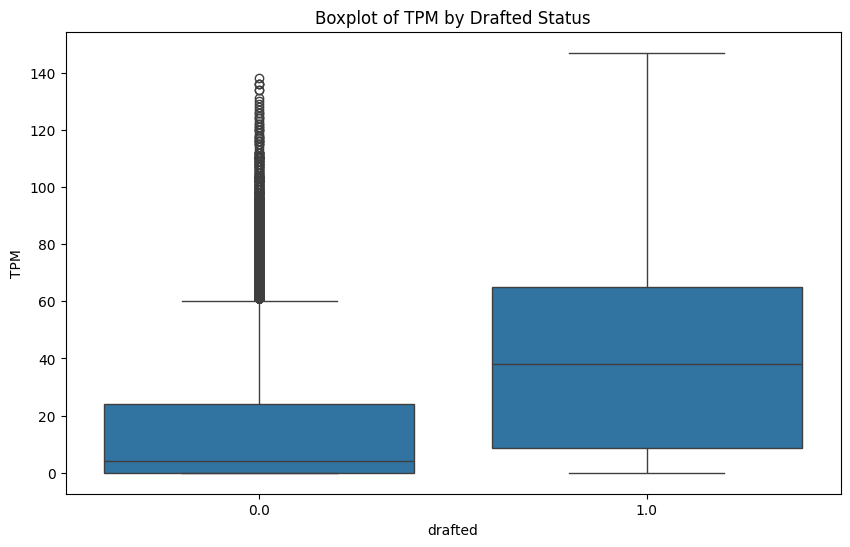

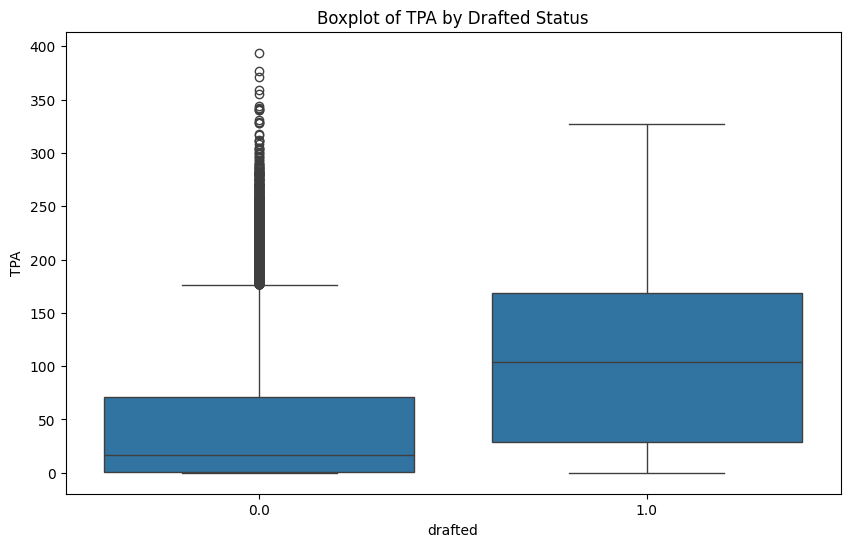

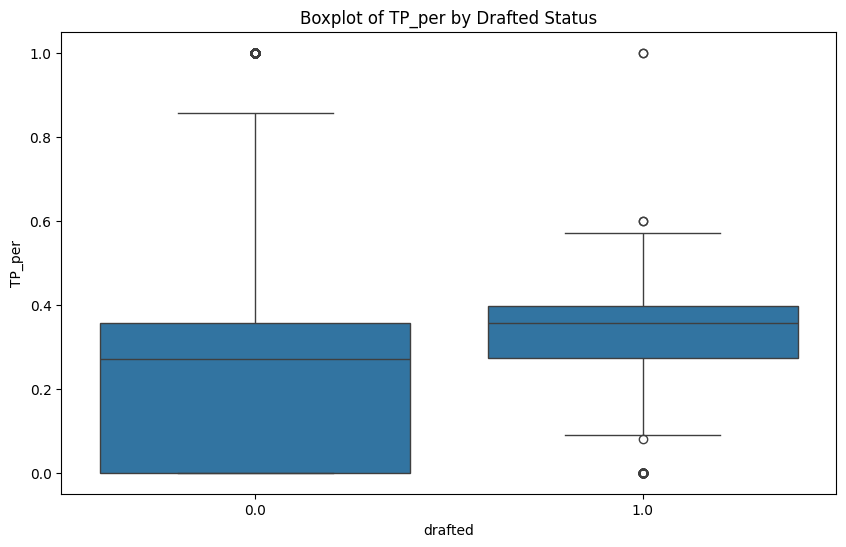

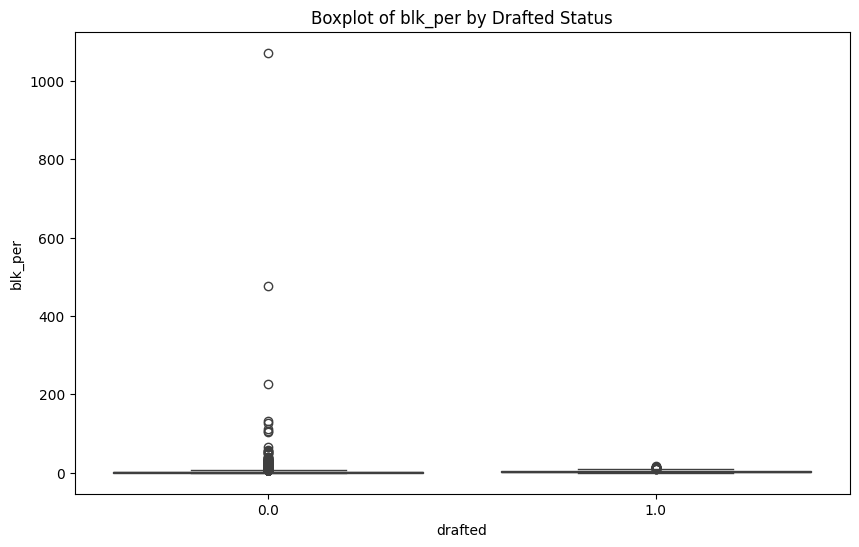

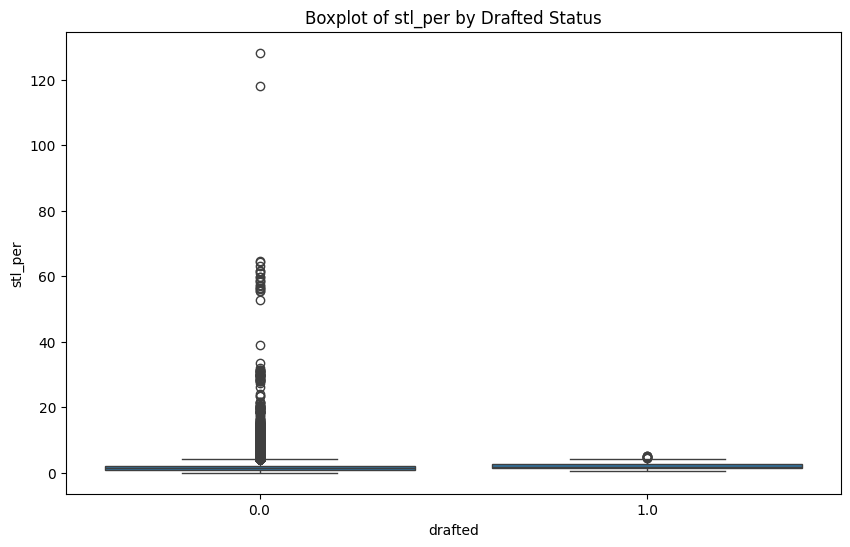

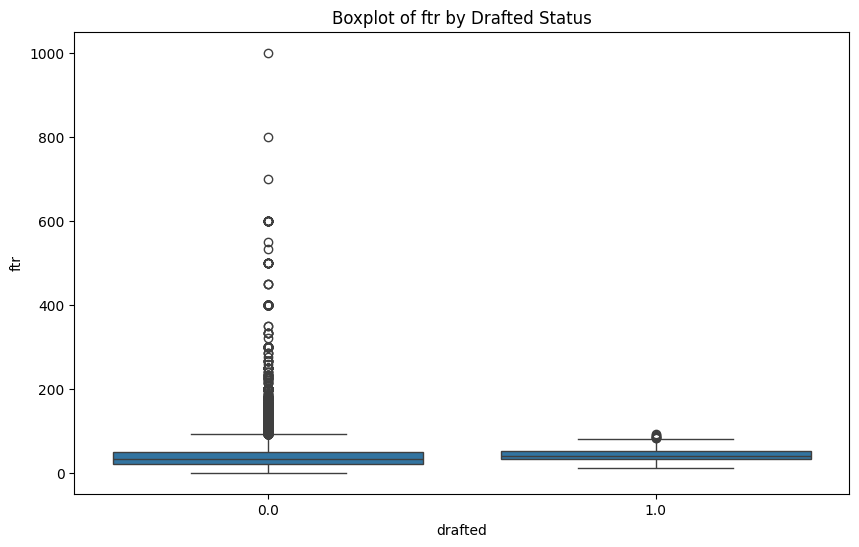

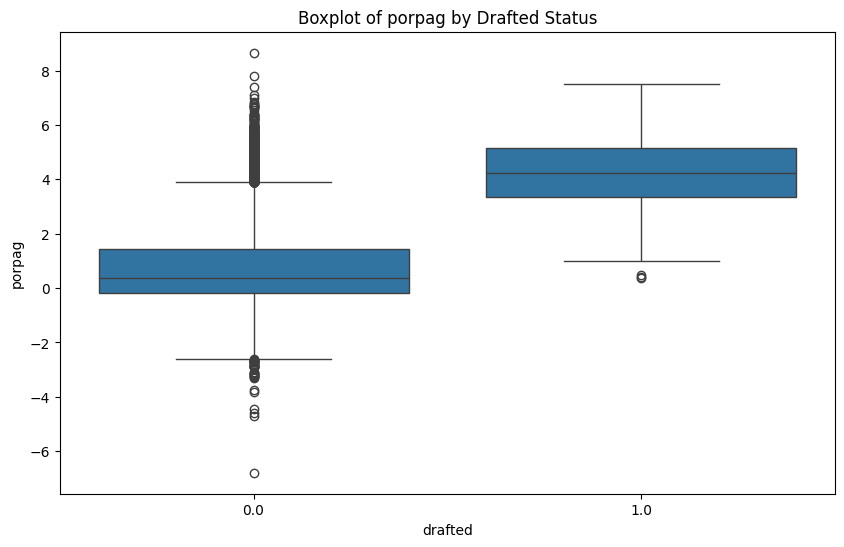

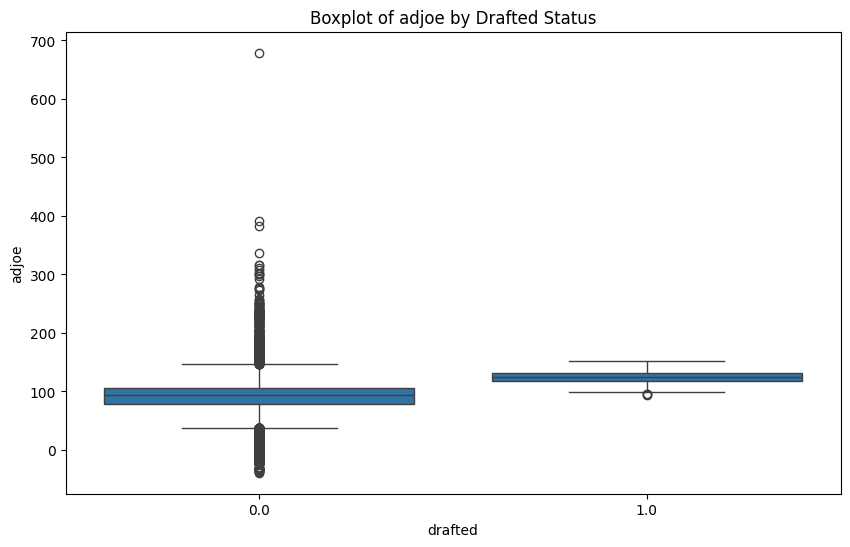

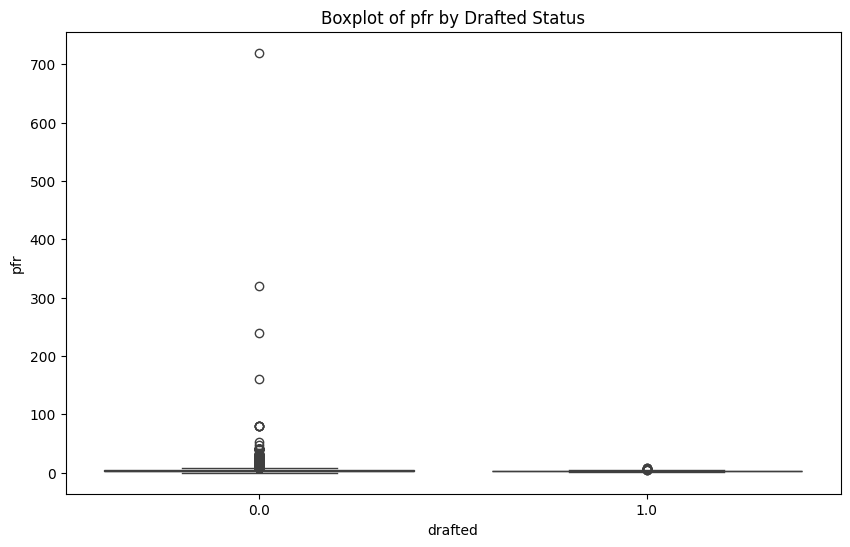

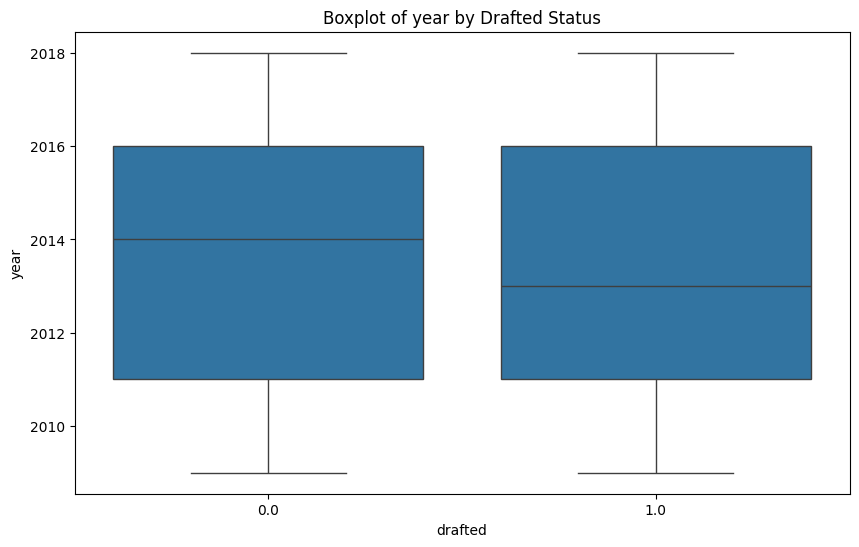

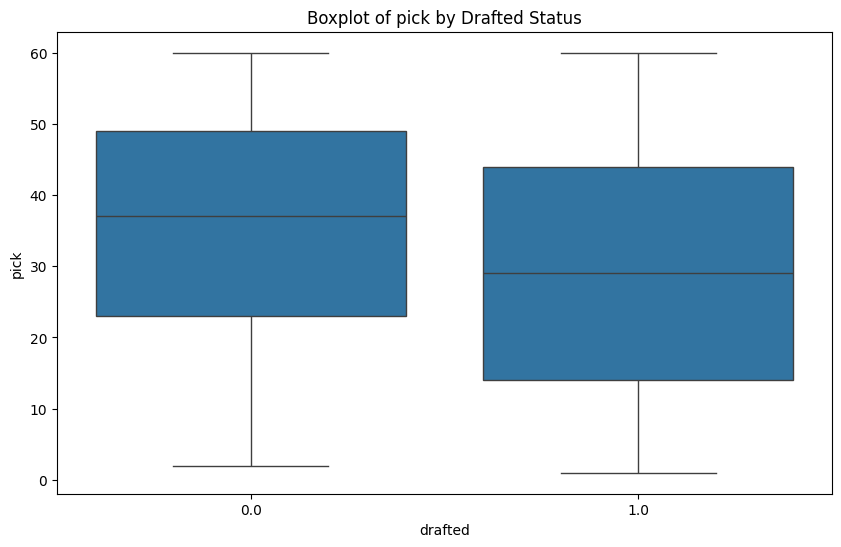

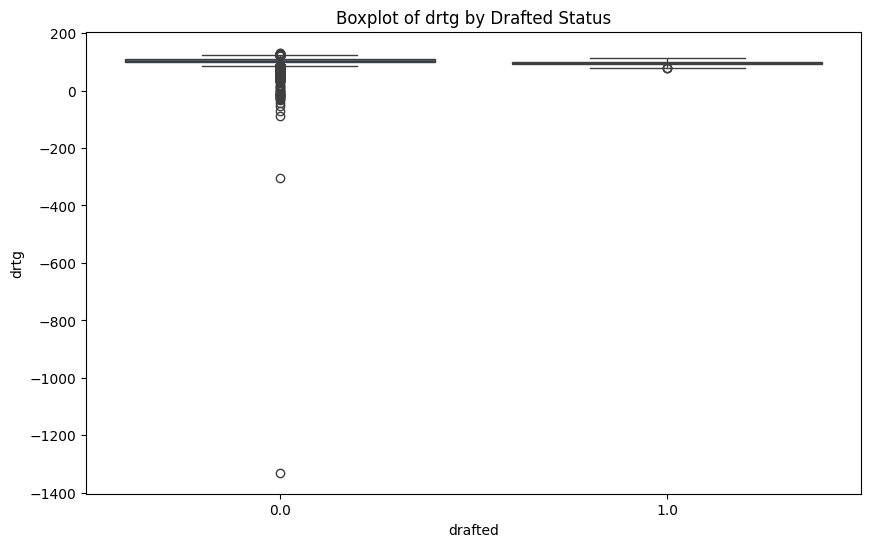

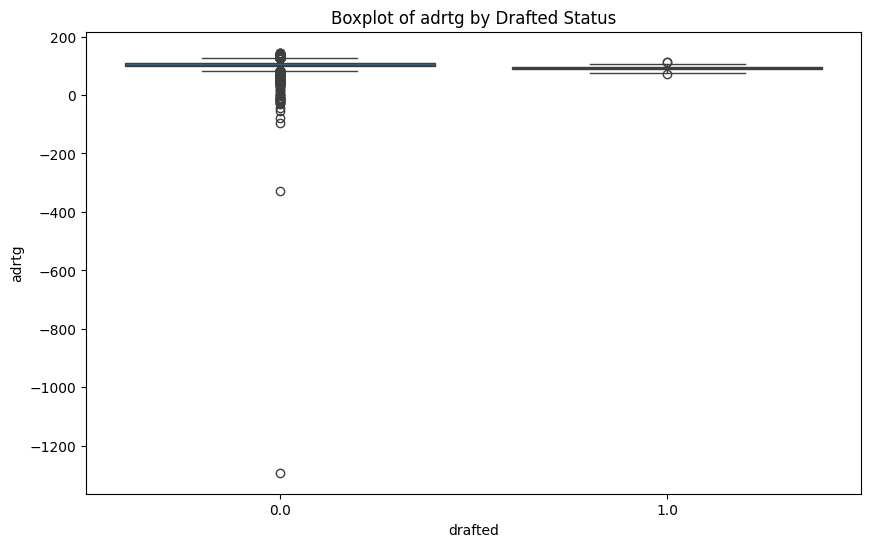

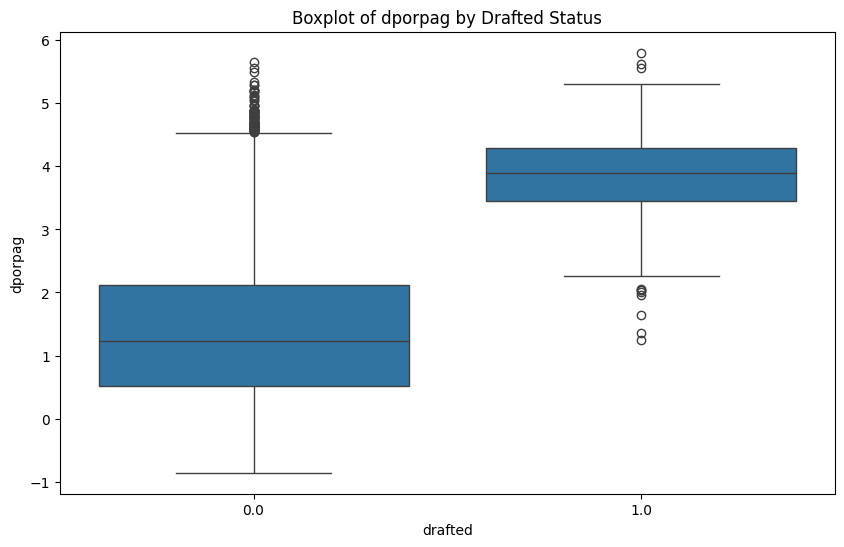

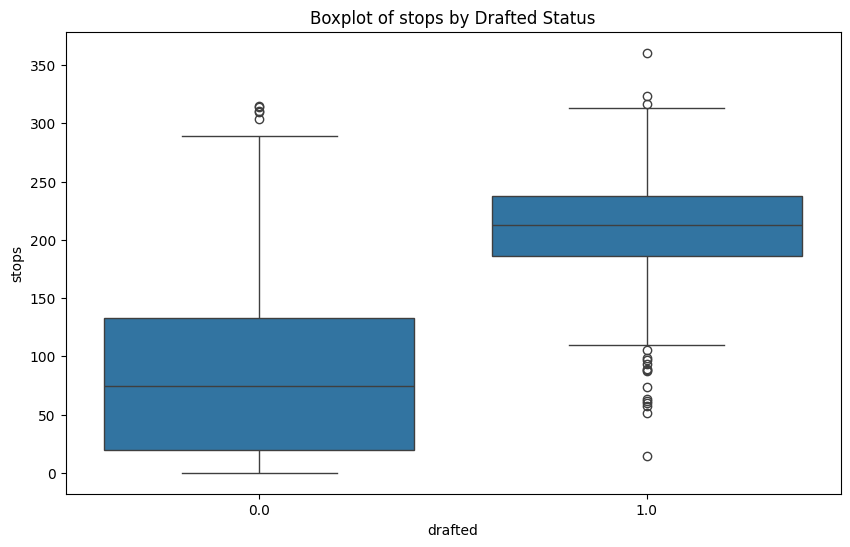

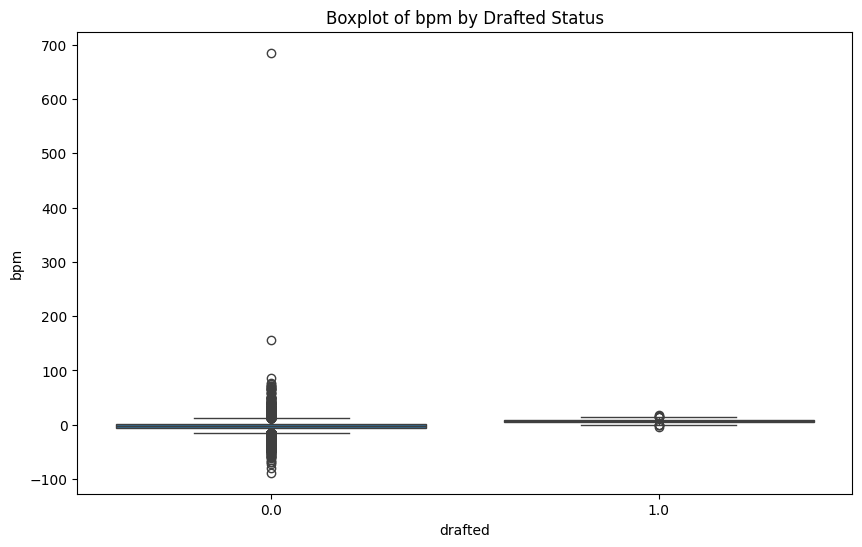

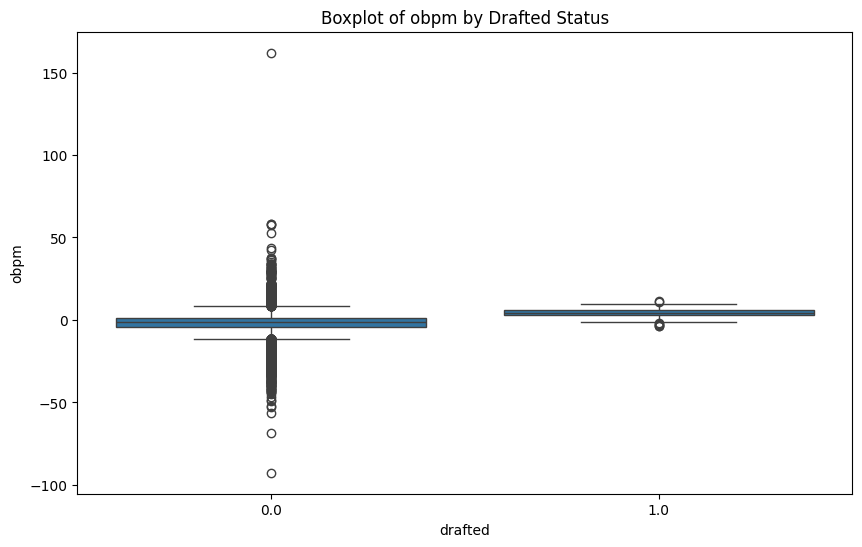

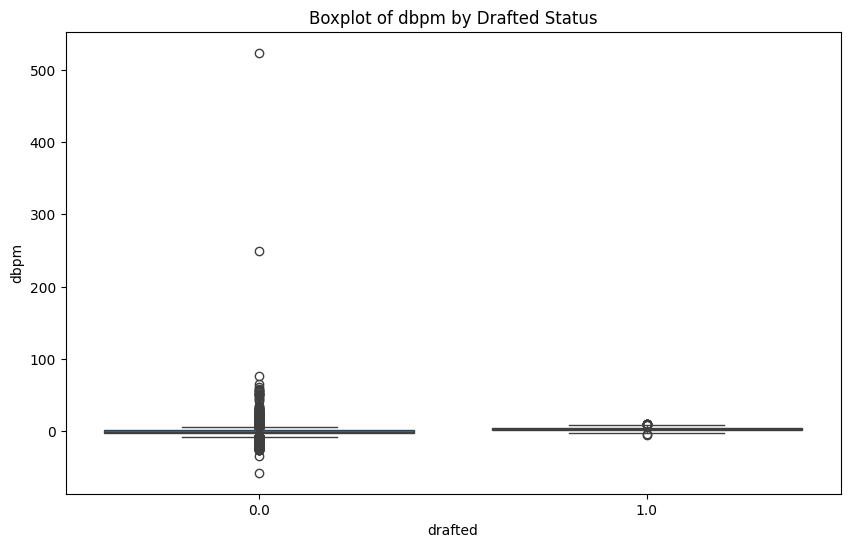

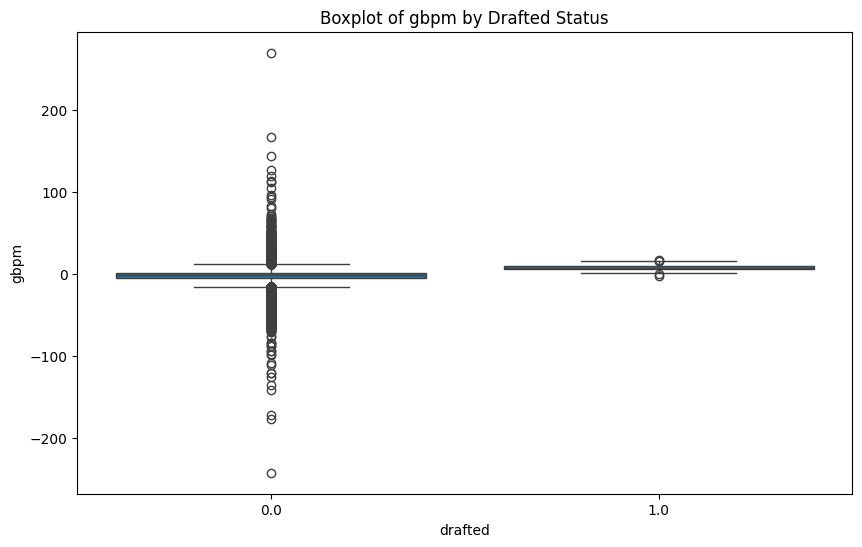

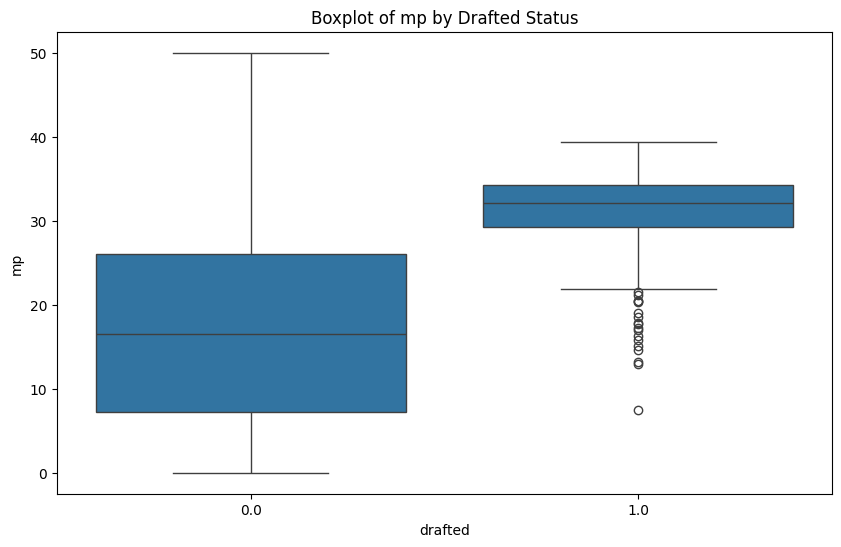

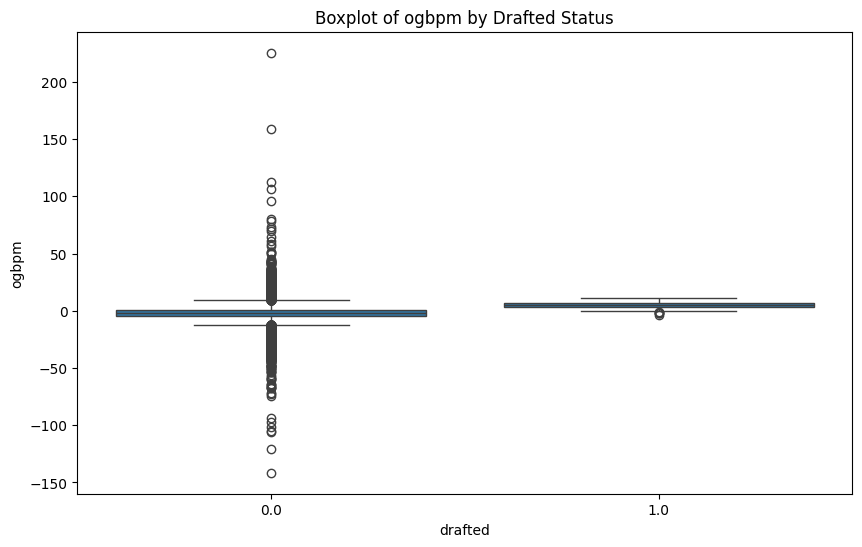

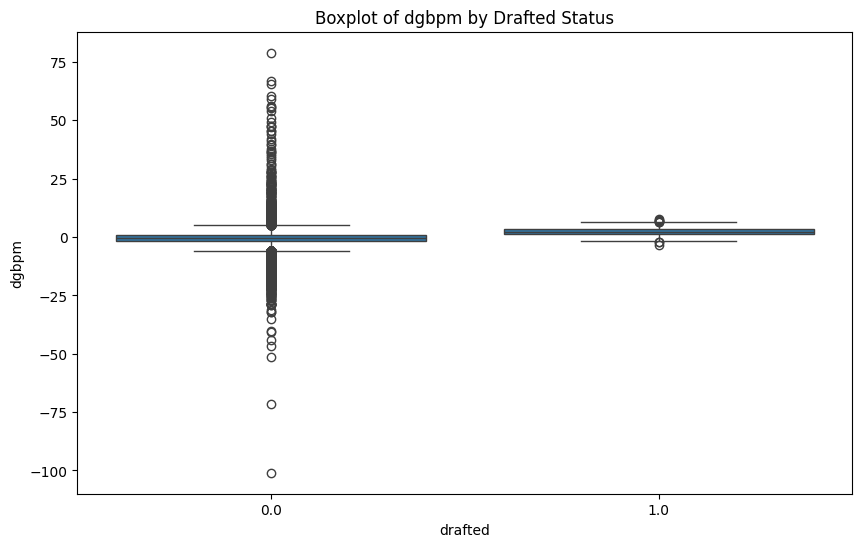

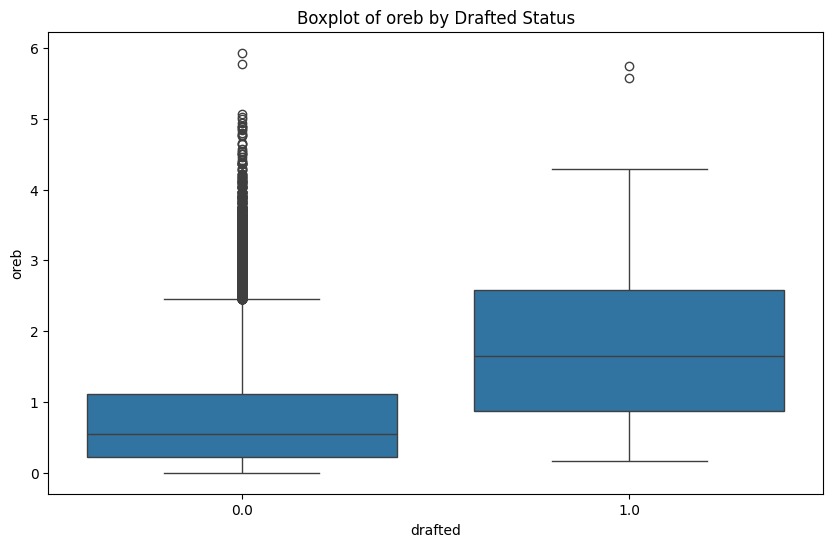

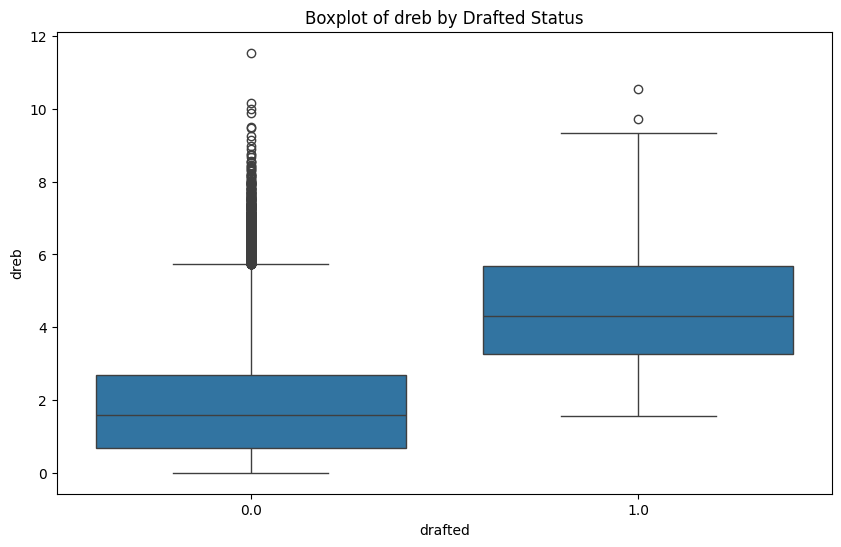

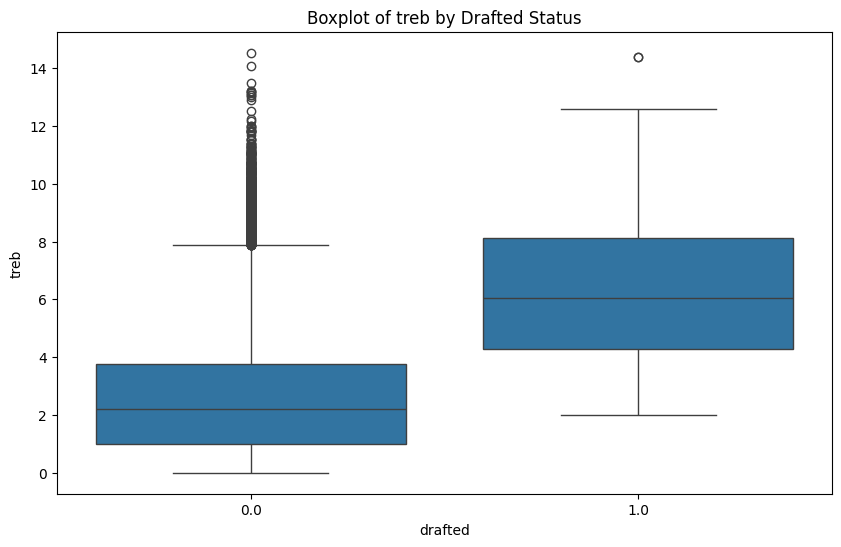

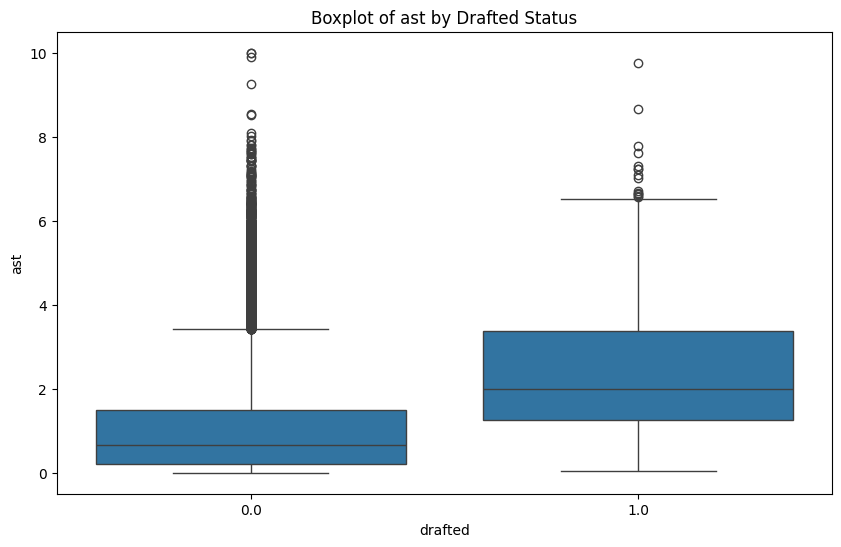

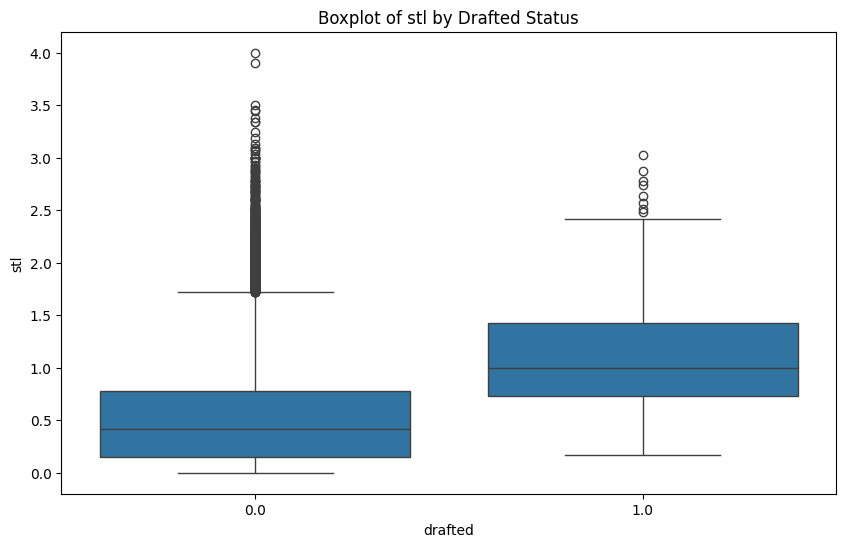

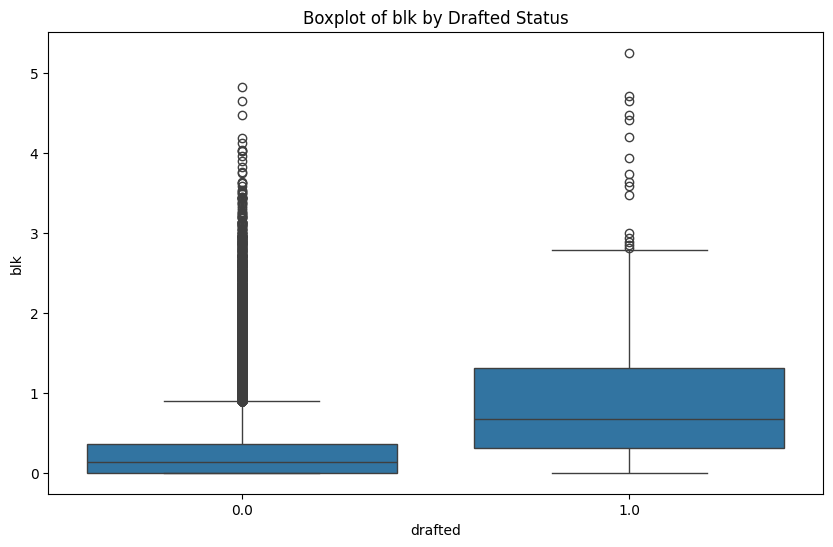

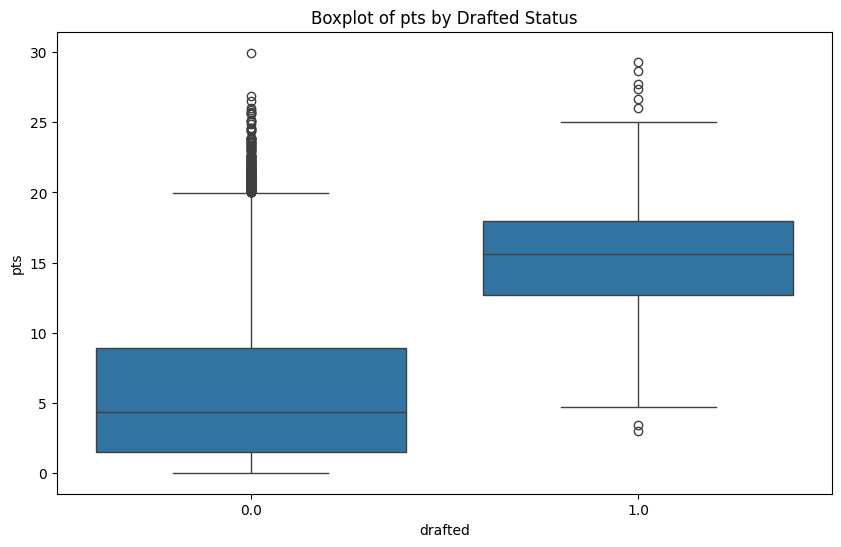

In [28]:
for col in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='drafted', y=col, data=df_cleaned)
    plt.title(f'Boxplot of {col} by Drafted Status')
    plt.show()

Numerical Features Distribution (Histograms)

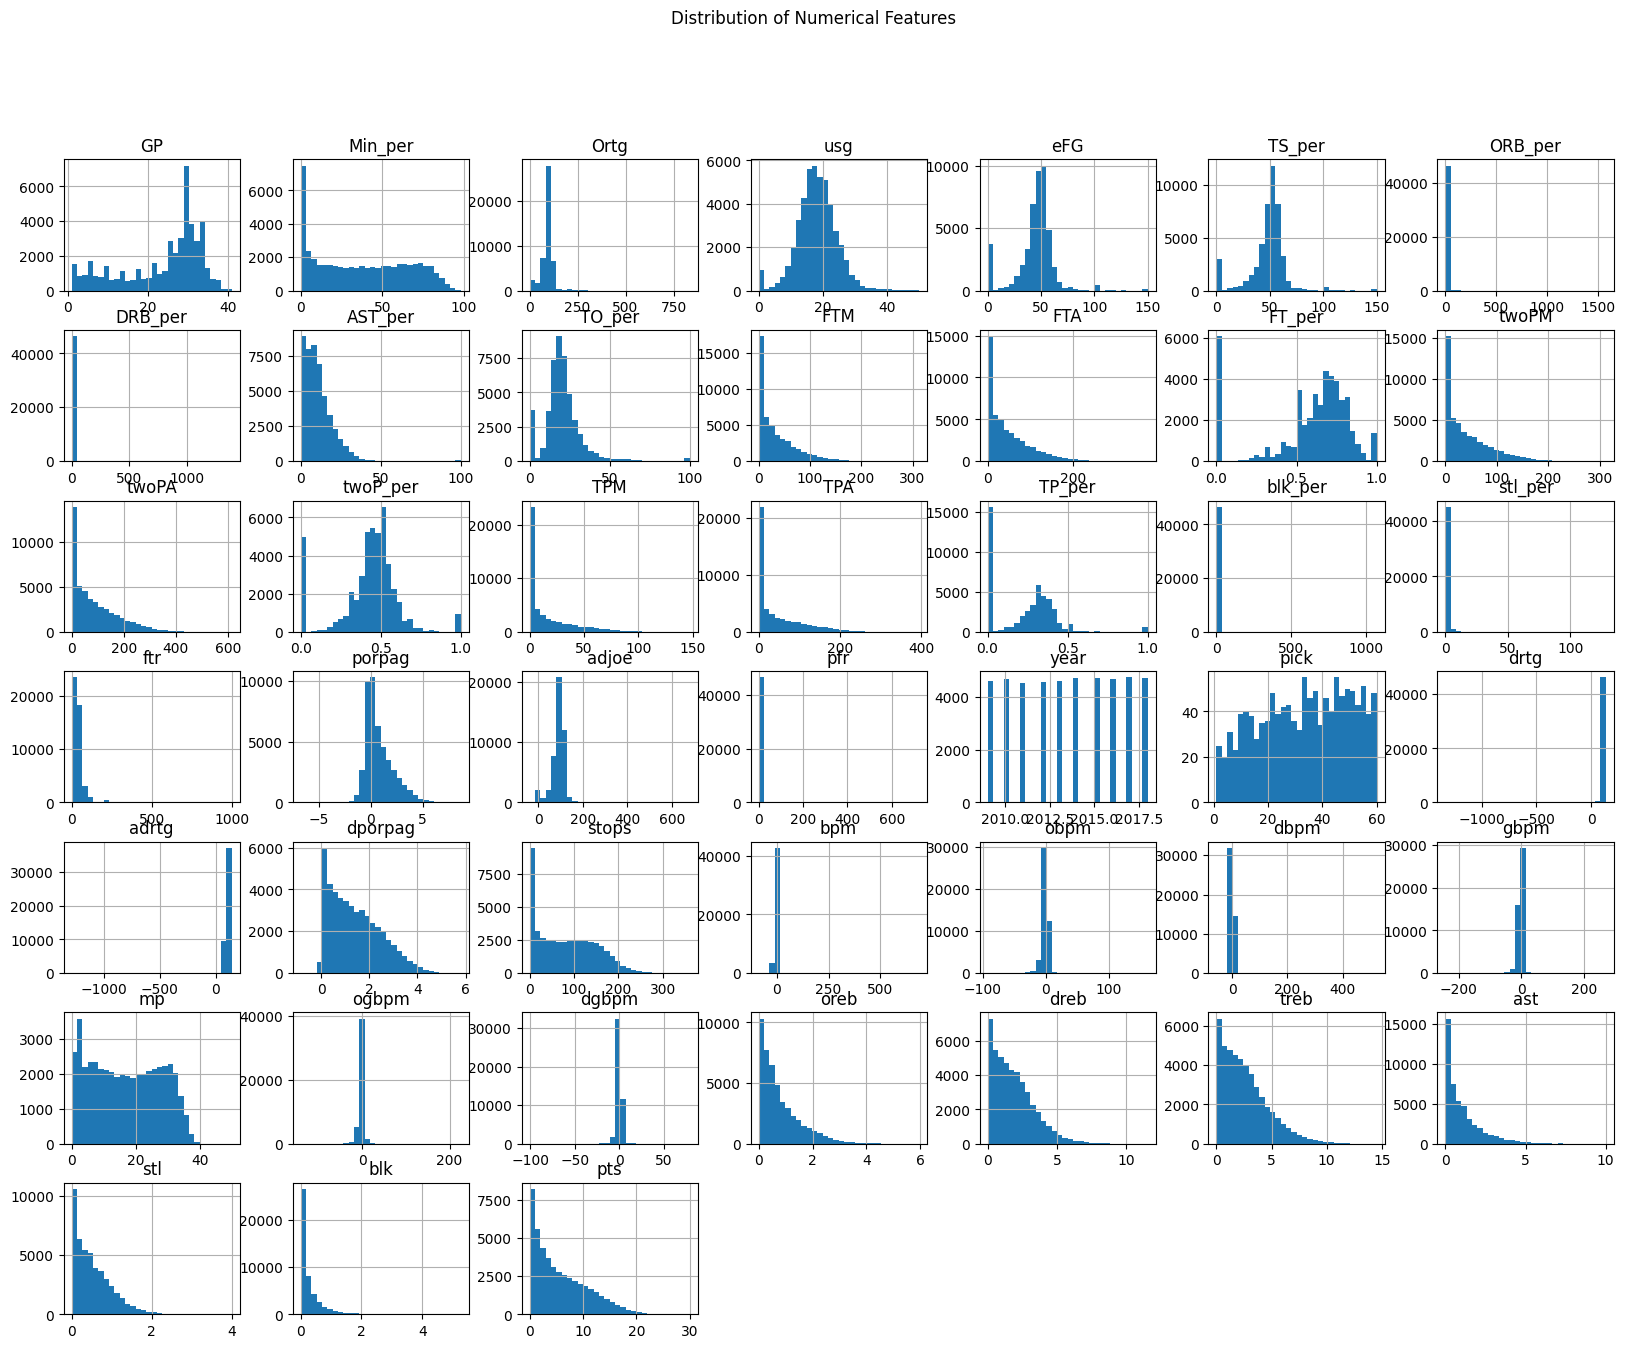

In [23]:
df_cleaned[numerical_features].hist(figsize=(20, 15), bins=30)
plt.suptitle('Distribution of Numerical Features')
plt.show()

Correlation Heatmap

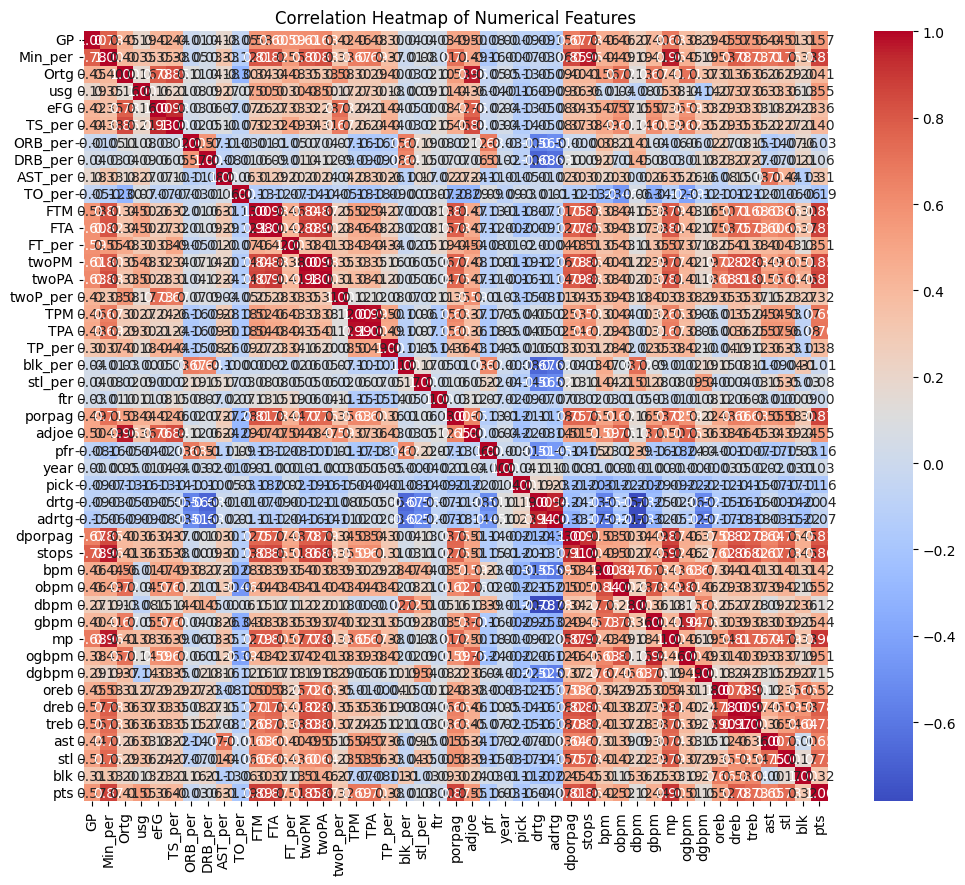

In [24]:
correlation_matrix = df_cleaned[numerical_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


Categorical Features Count Plots

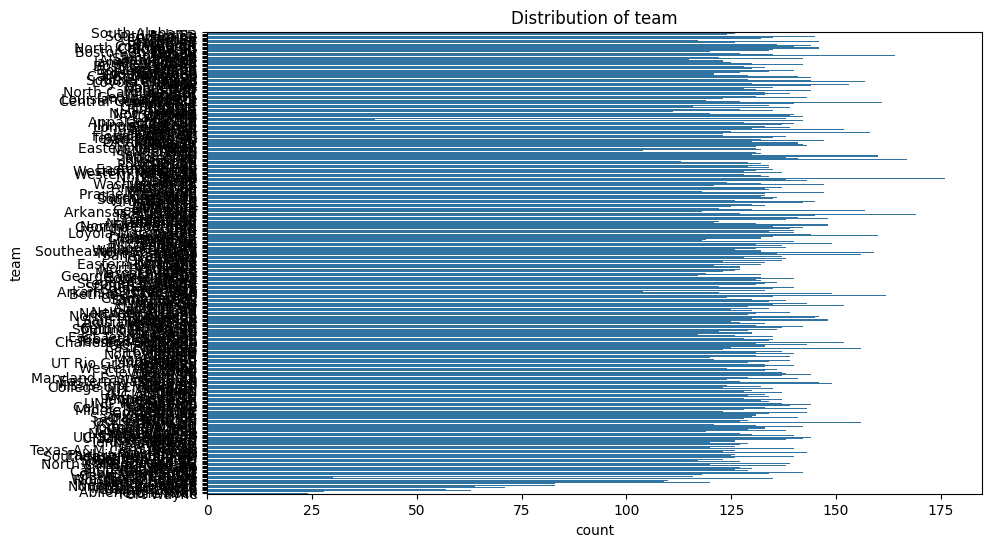

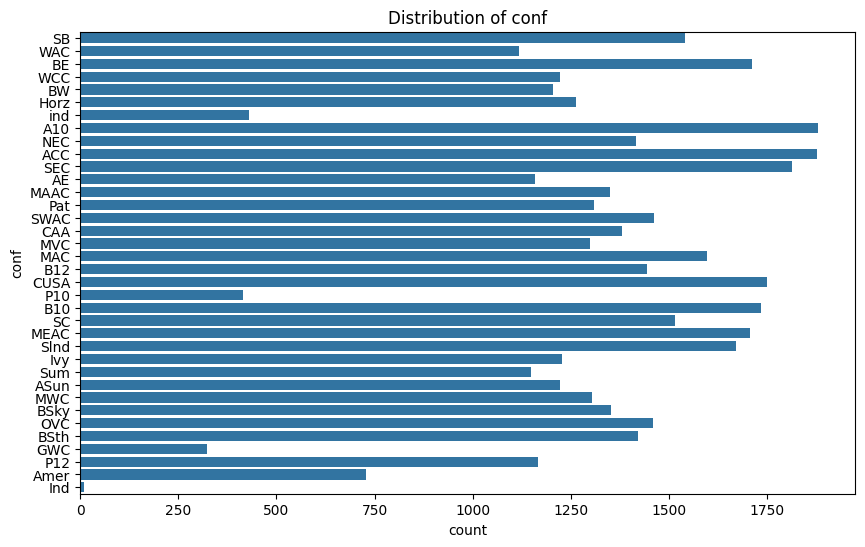

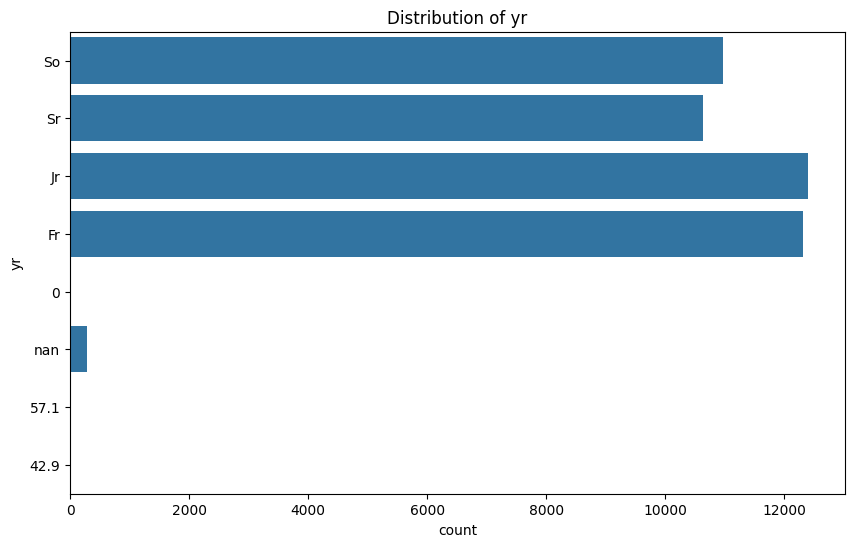

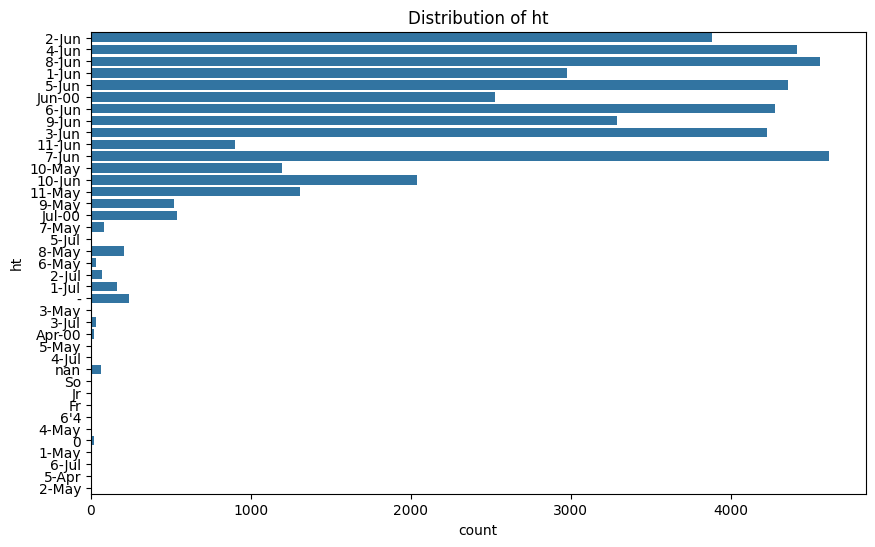

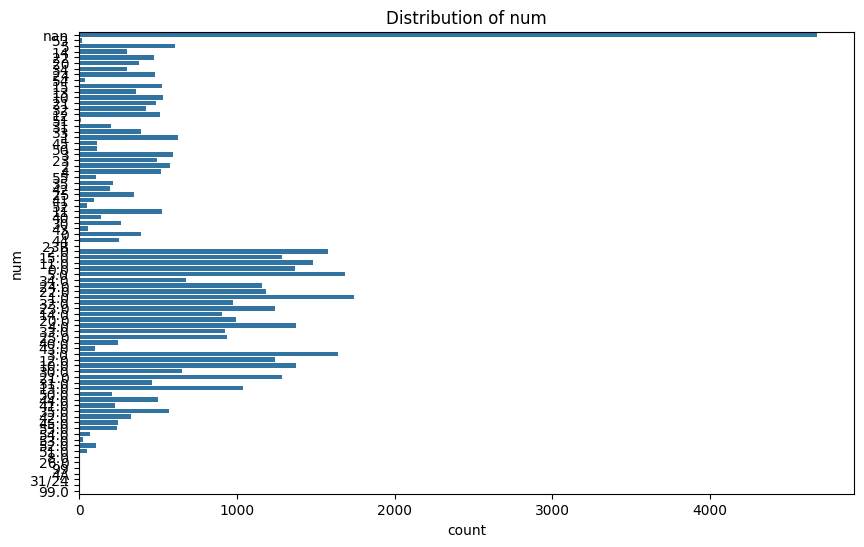

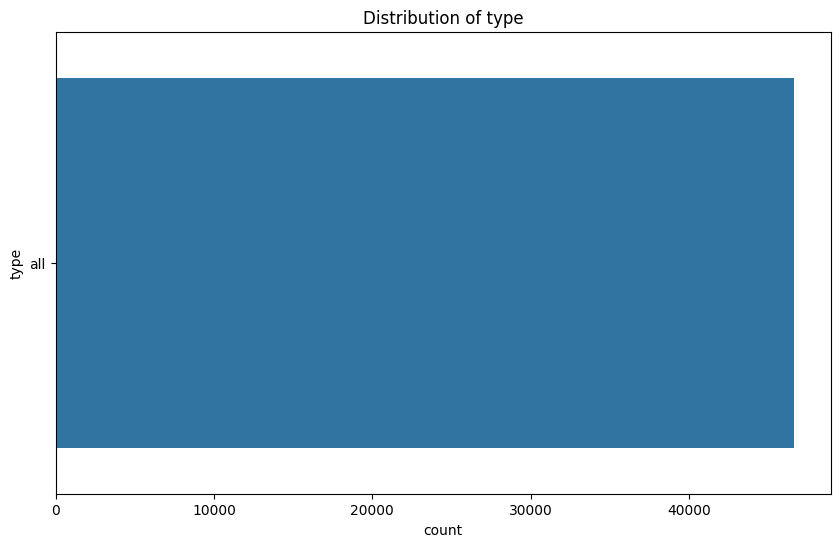

In [25]:
for col in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=col, data=df_cleaned)
    plt.title(f'Distribution of {col}')
    plt.show()

Violin Plots for Categorical vs Numerical Relationships

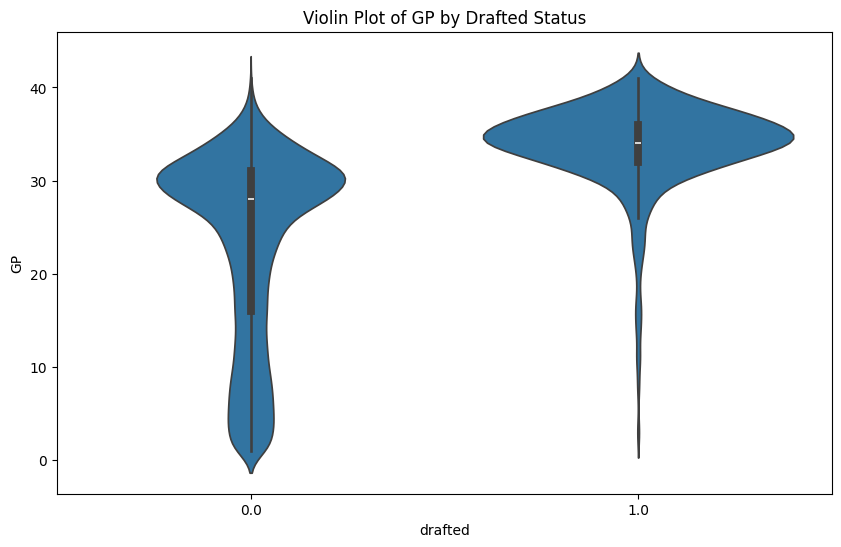

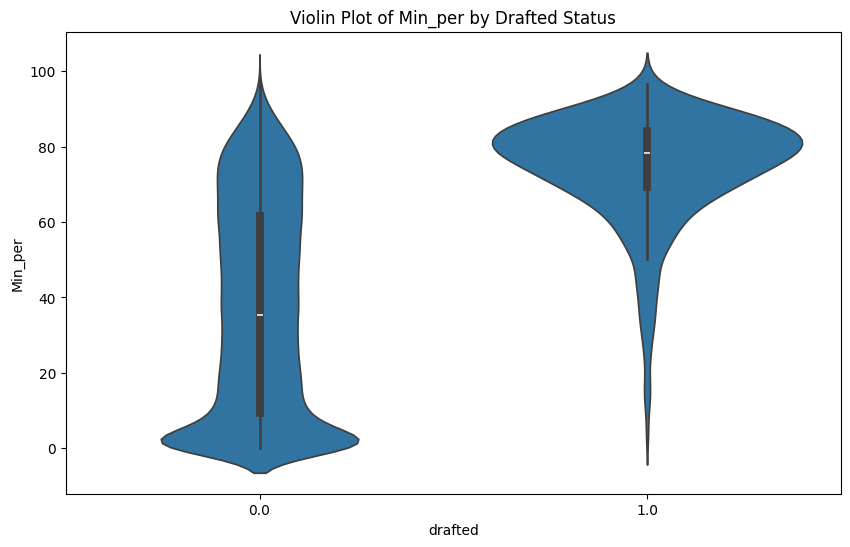

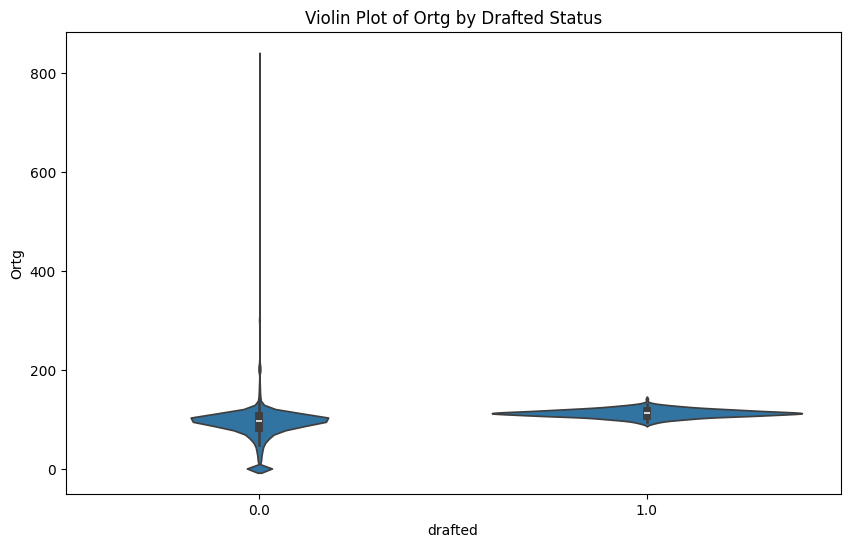

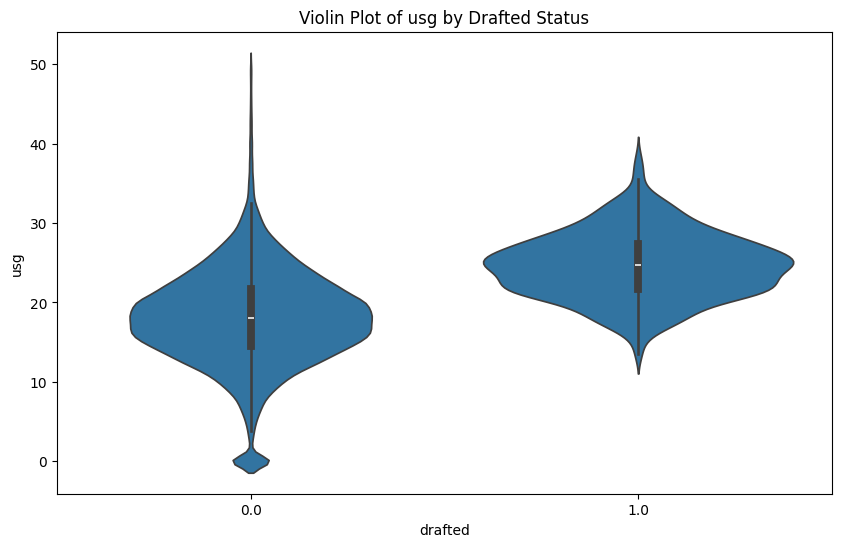

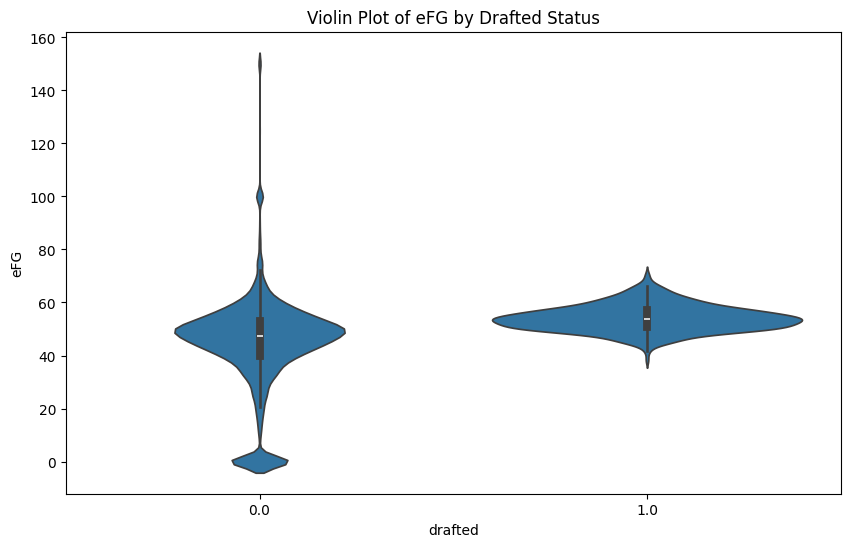

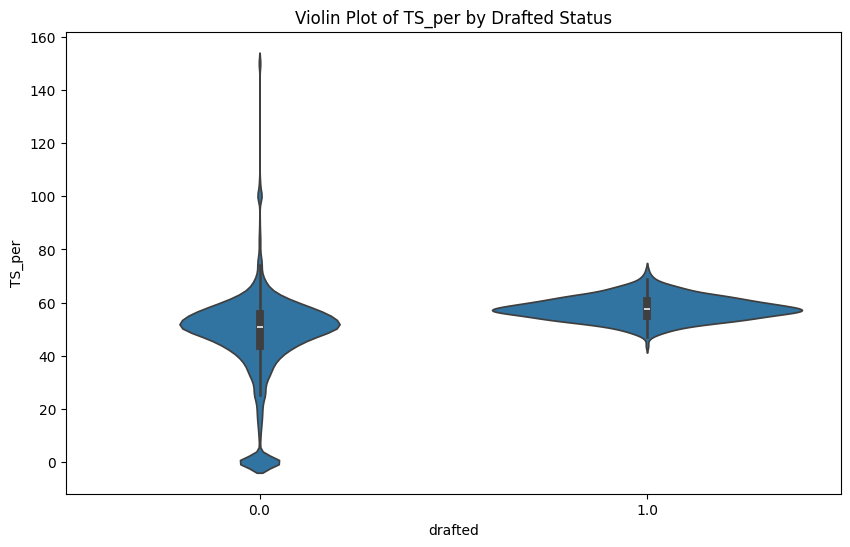

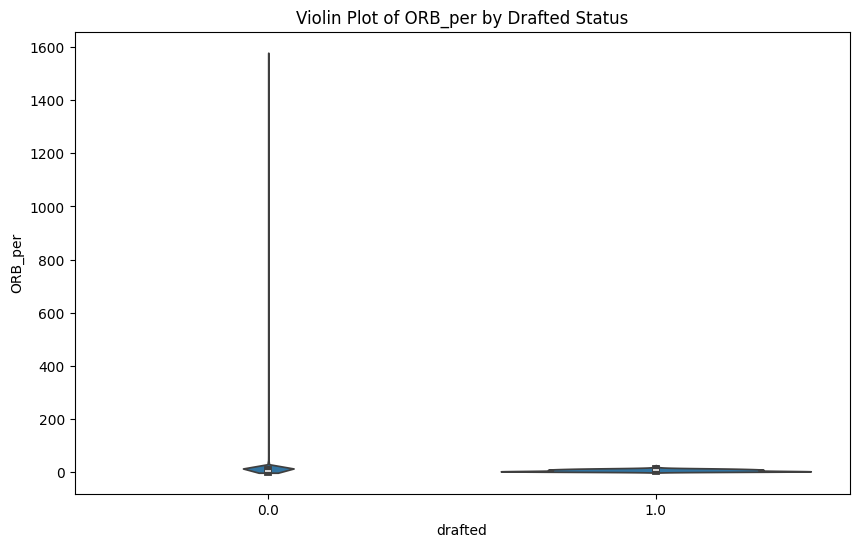

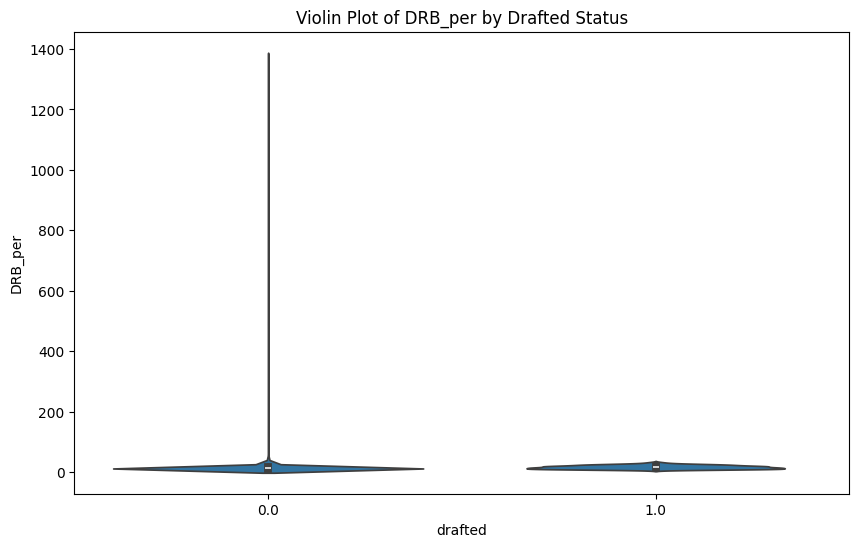

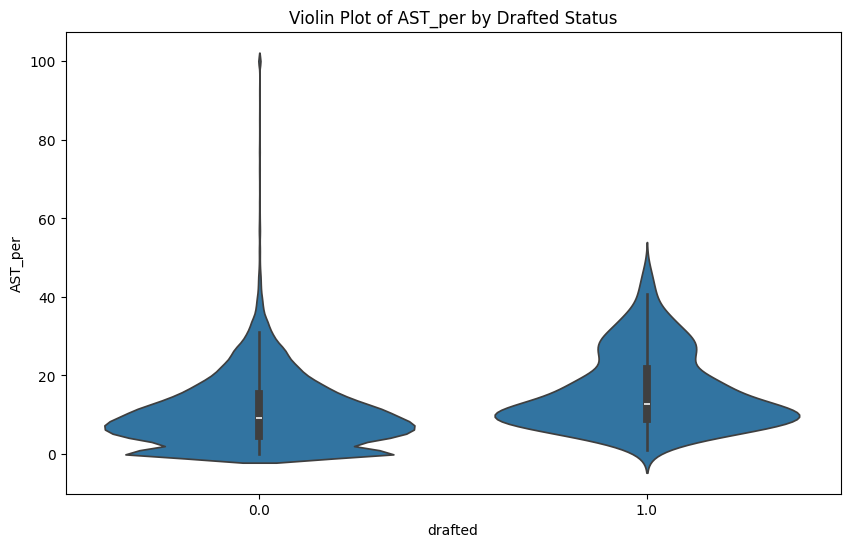

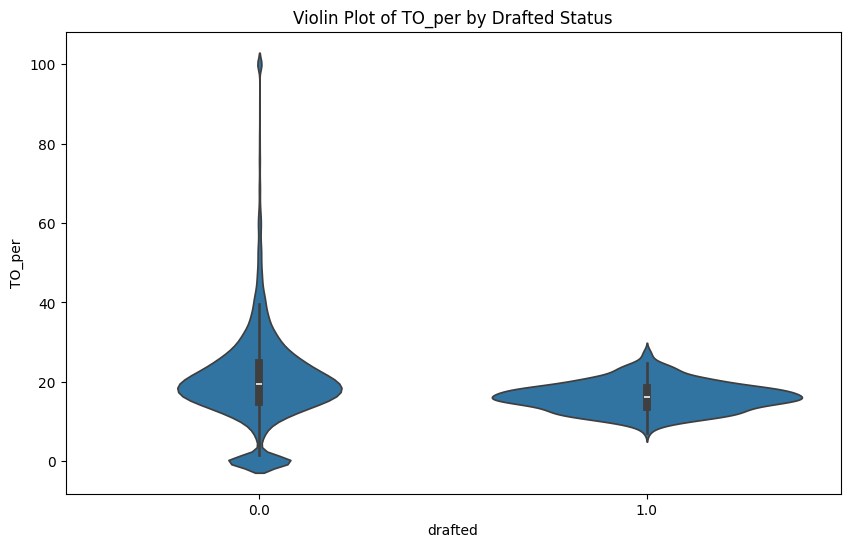

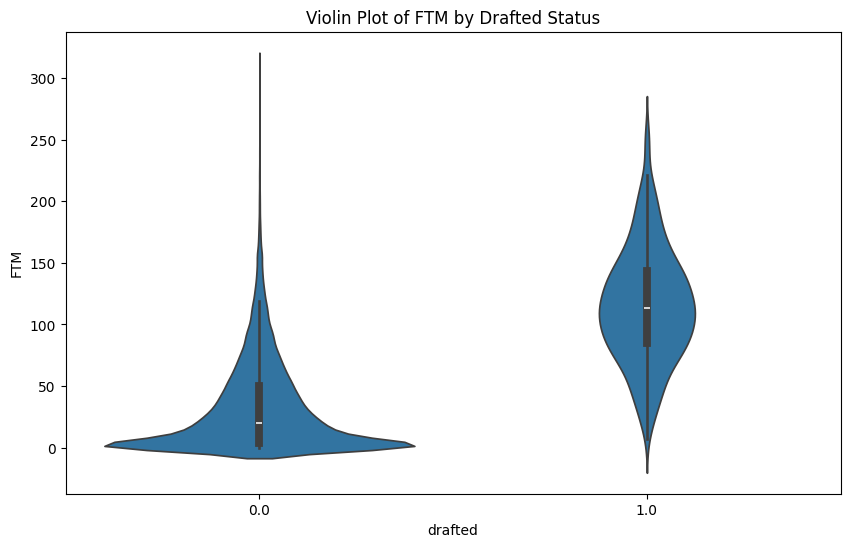

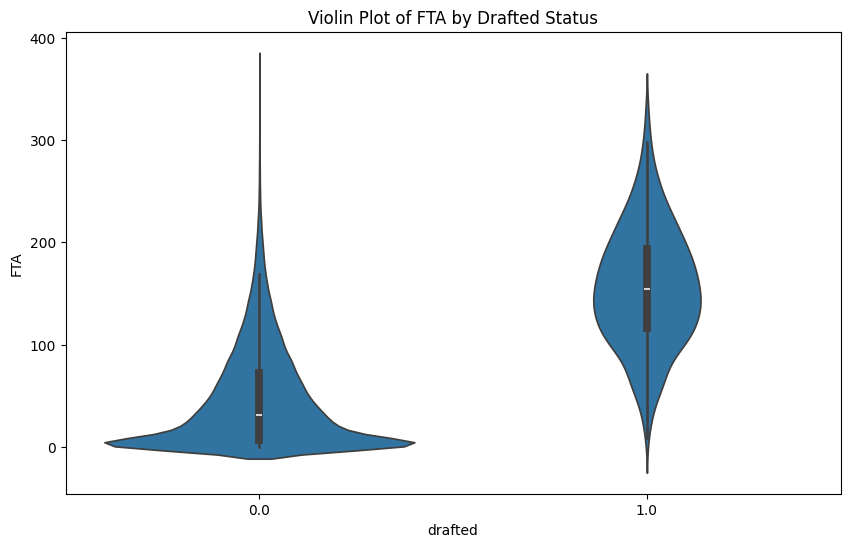

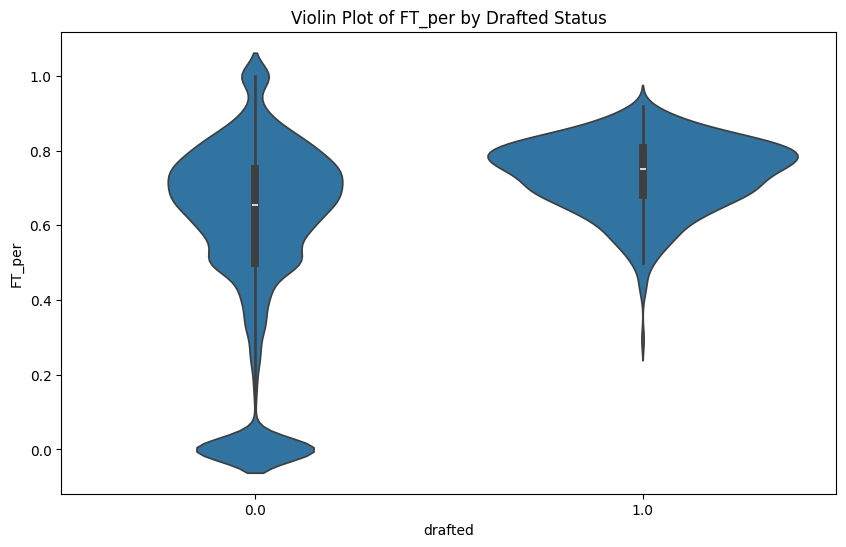

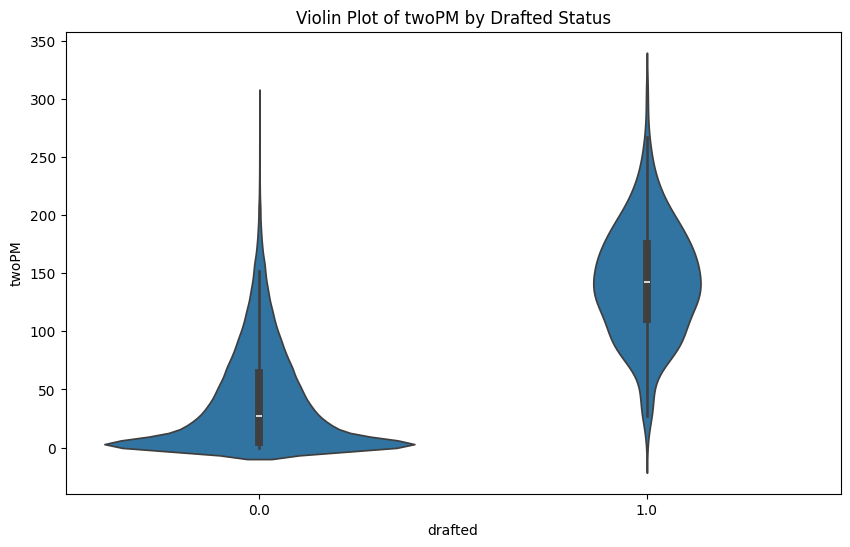

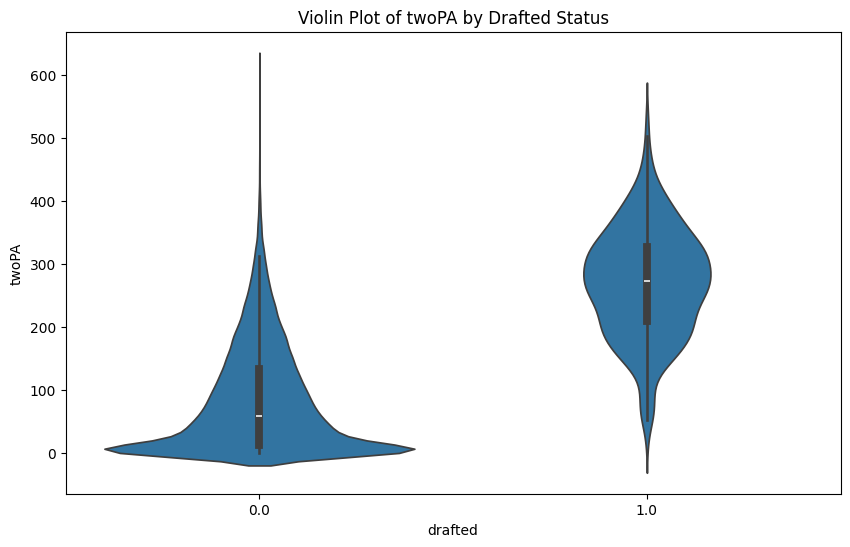

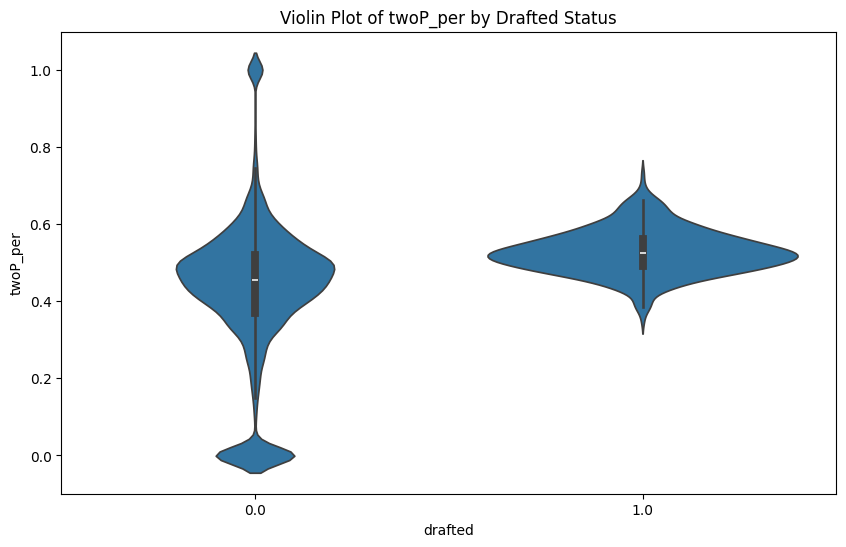

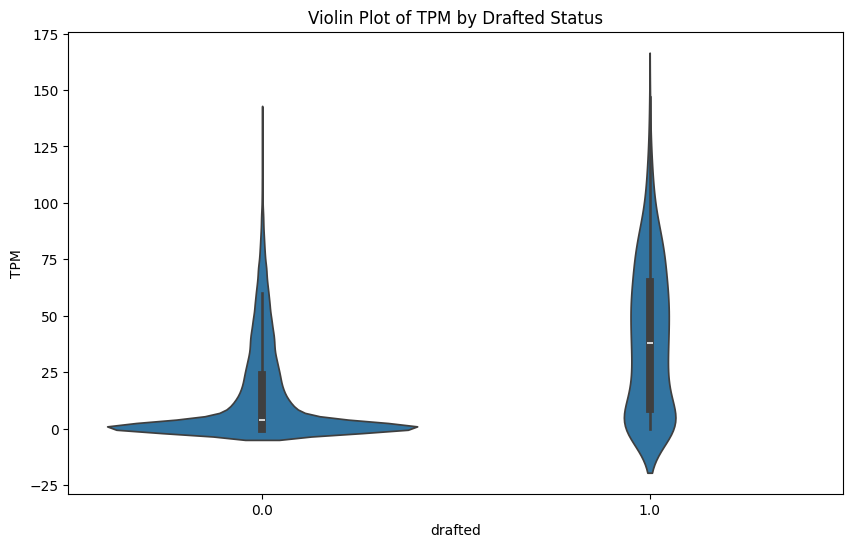

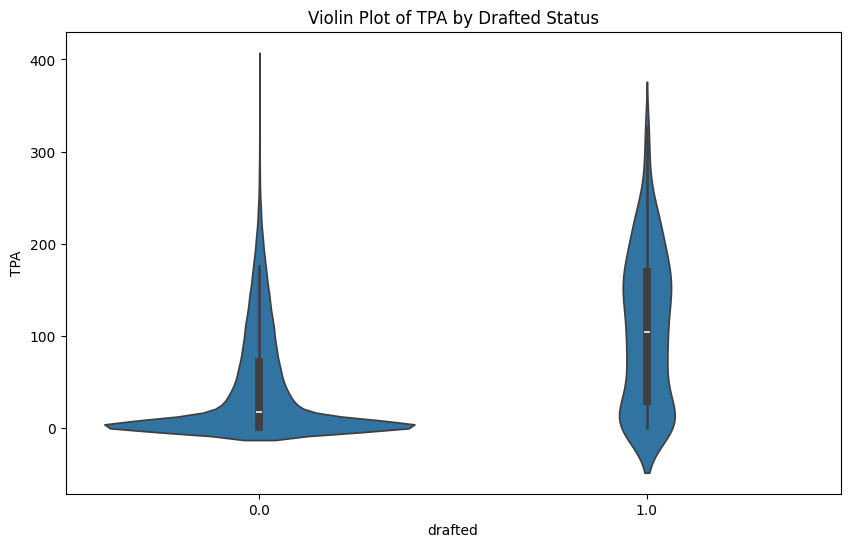

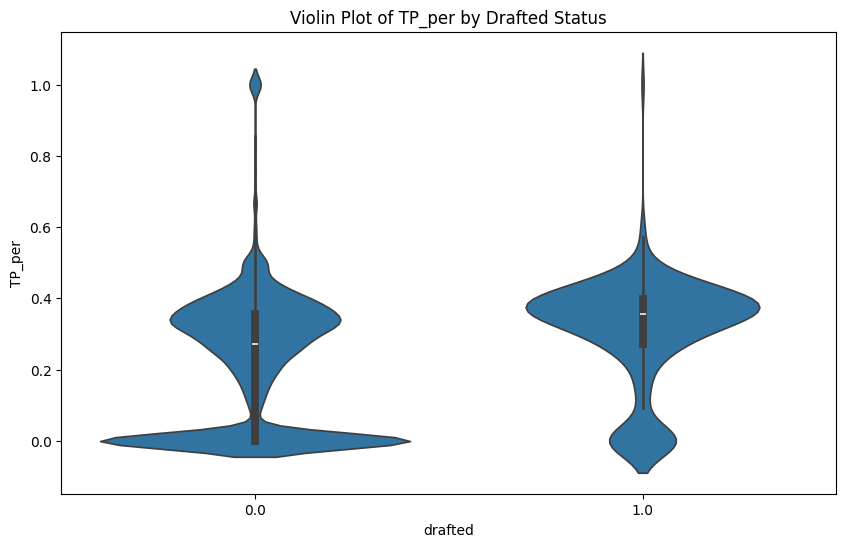

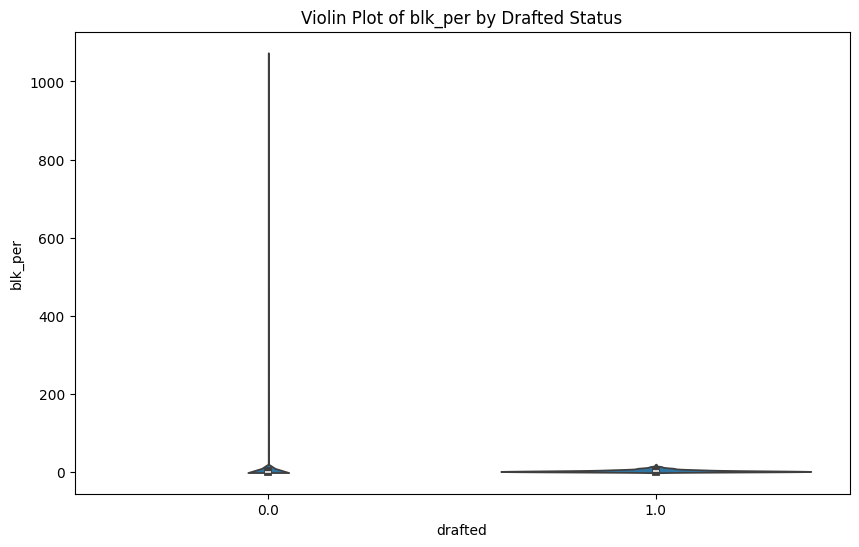

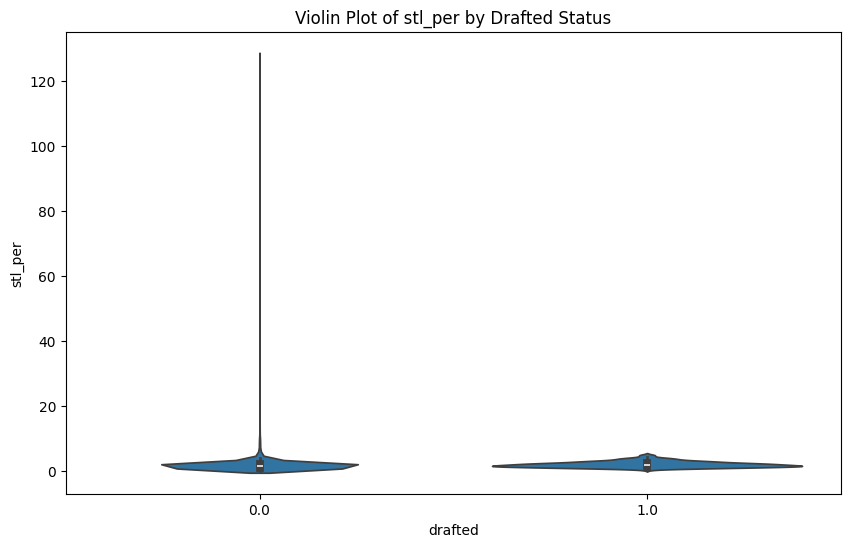

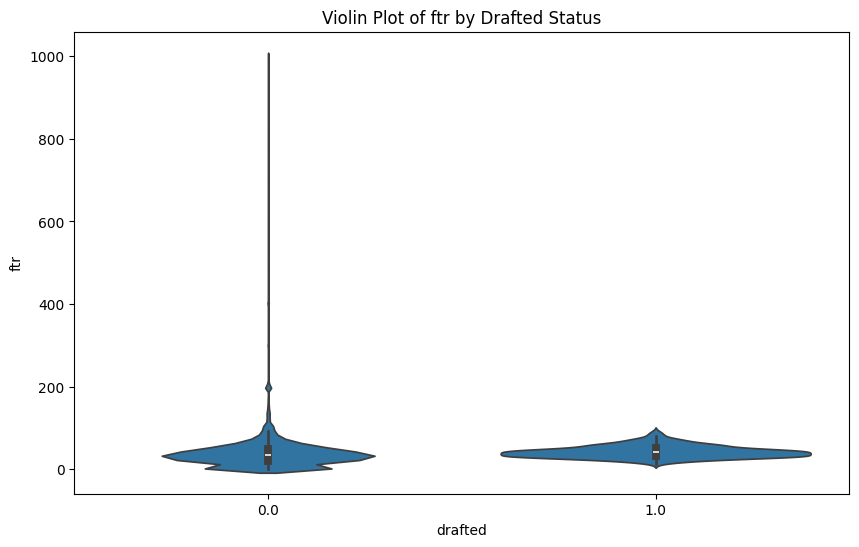

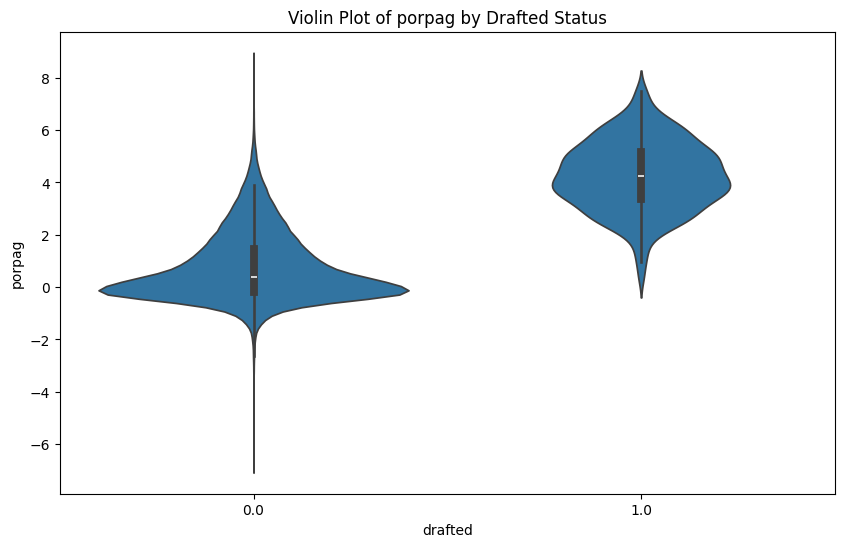

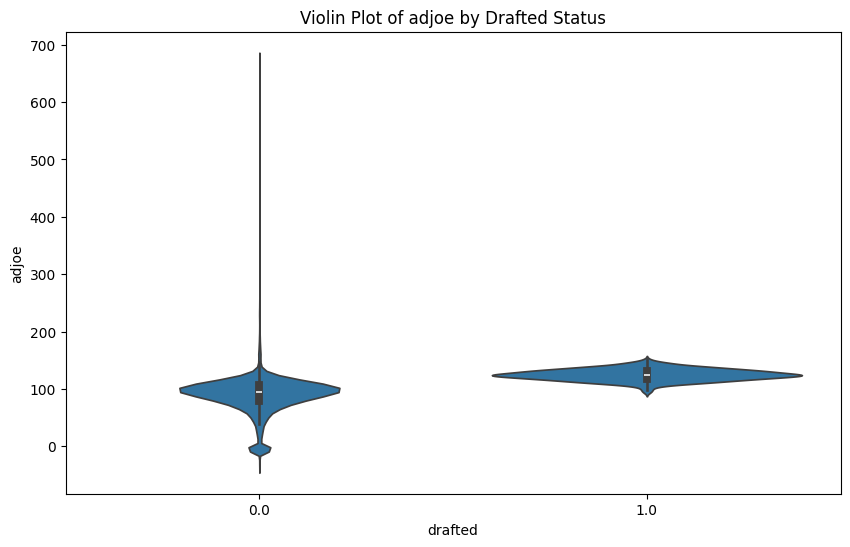

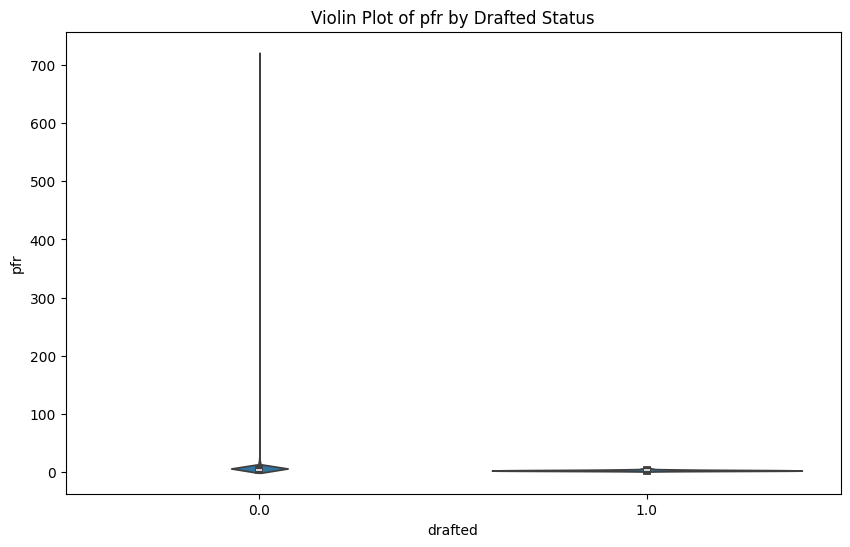

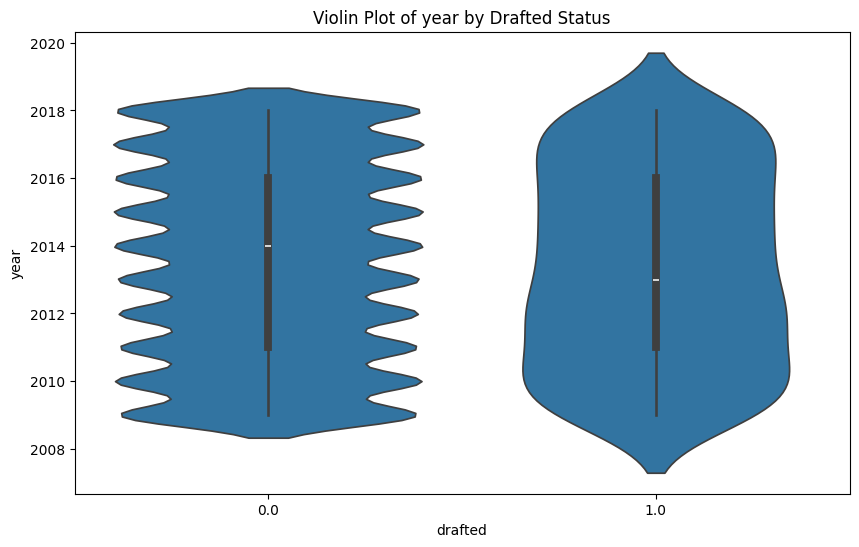

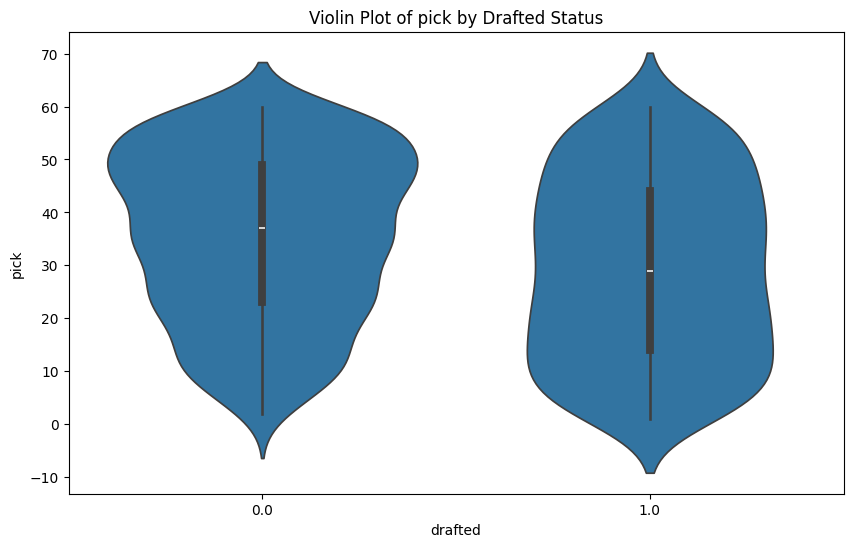

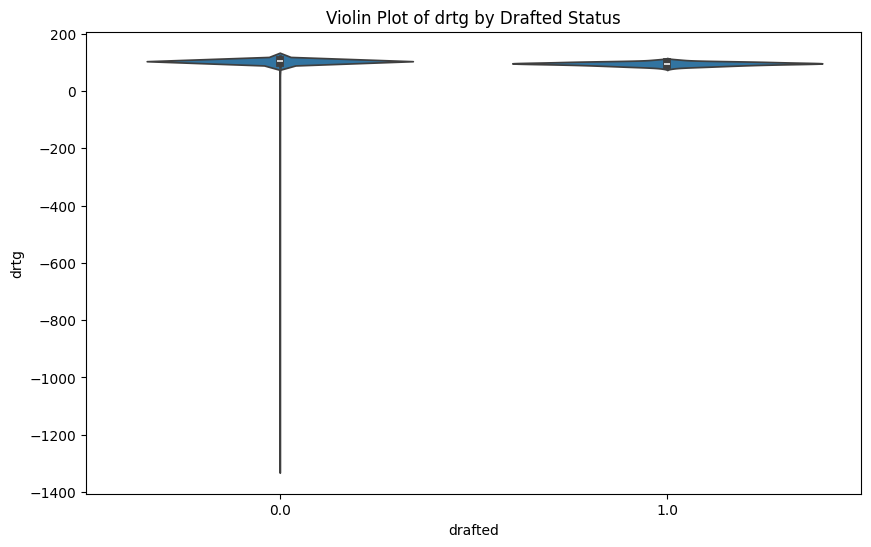

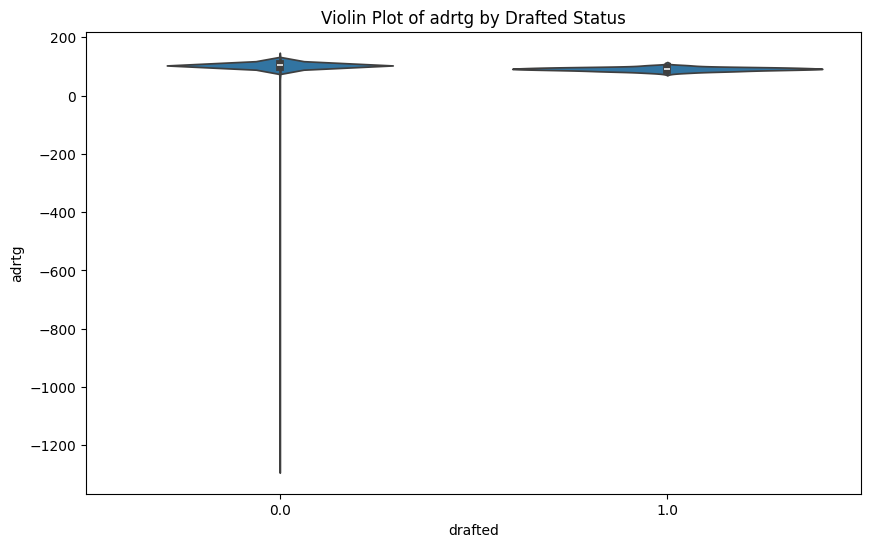

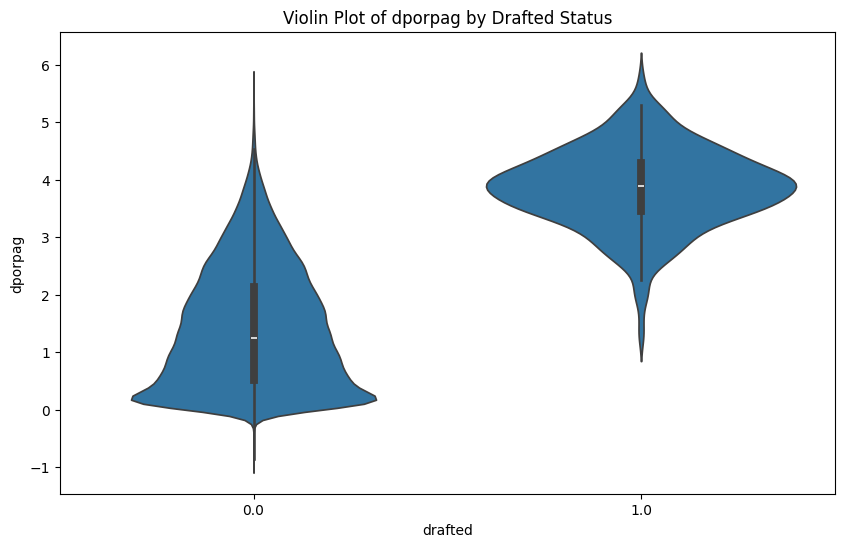

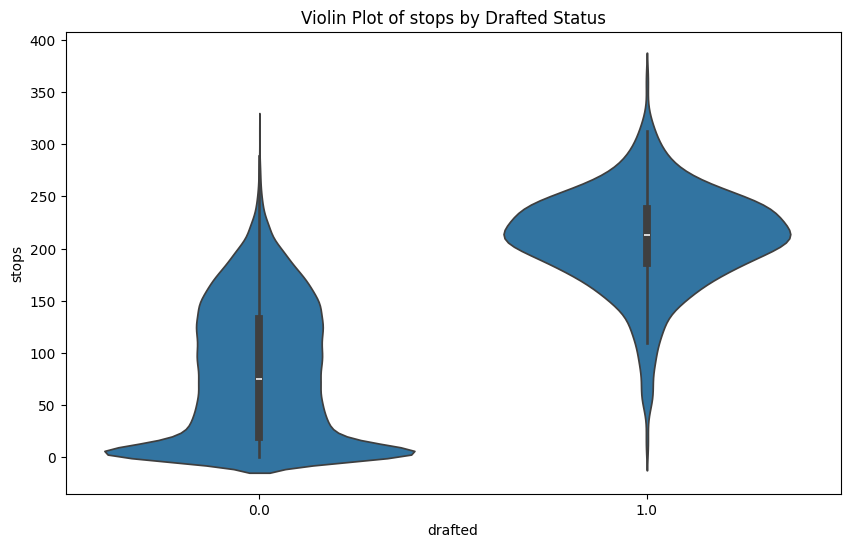

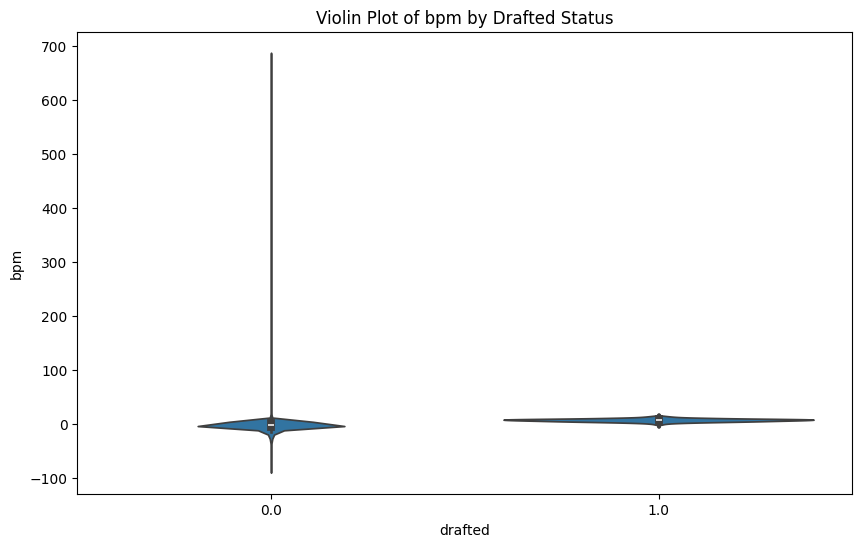

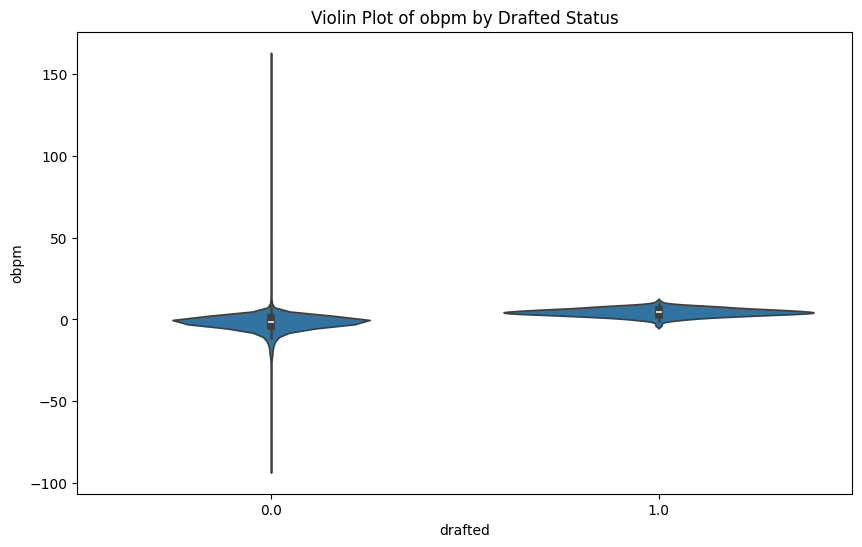

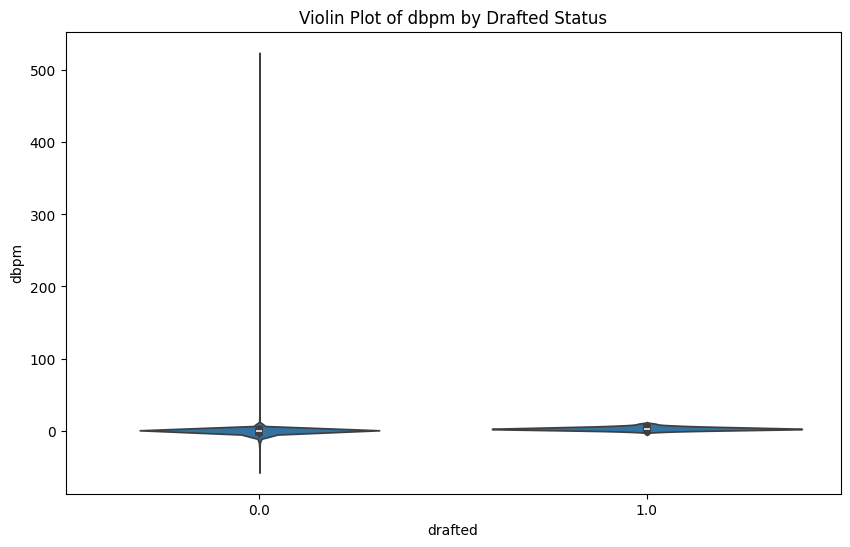

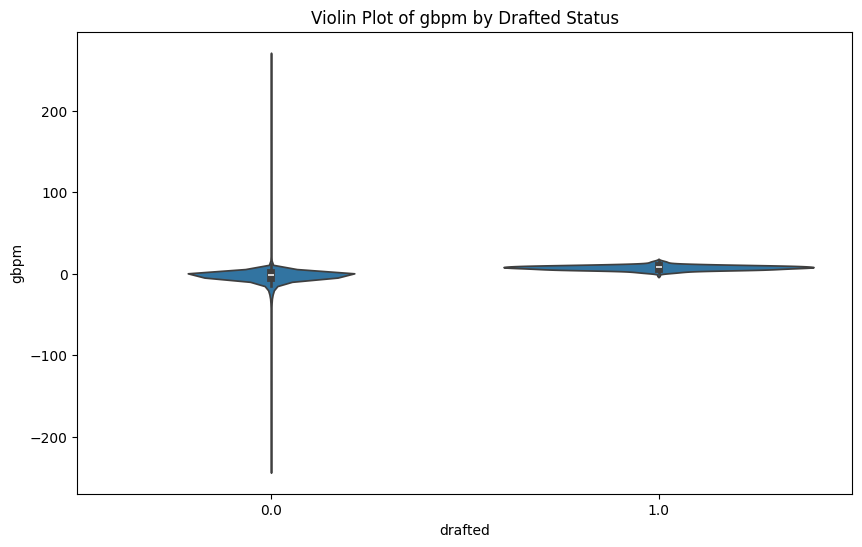

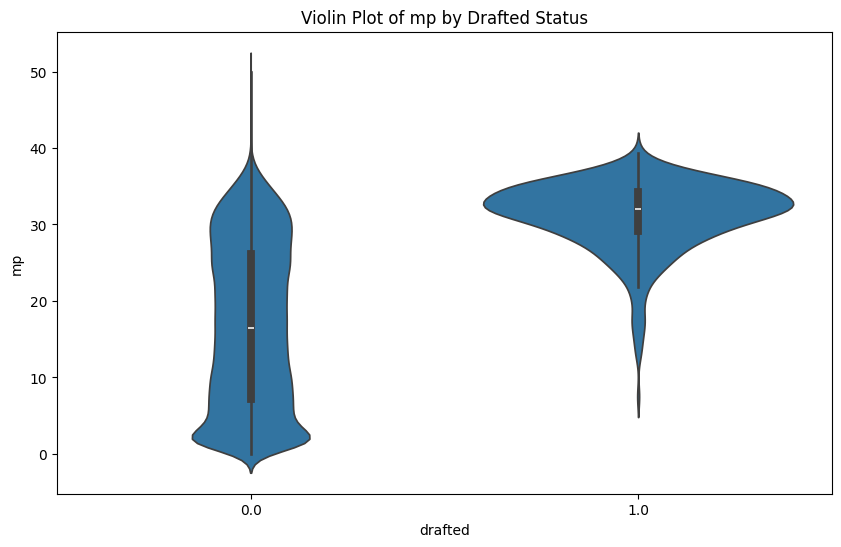

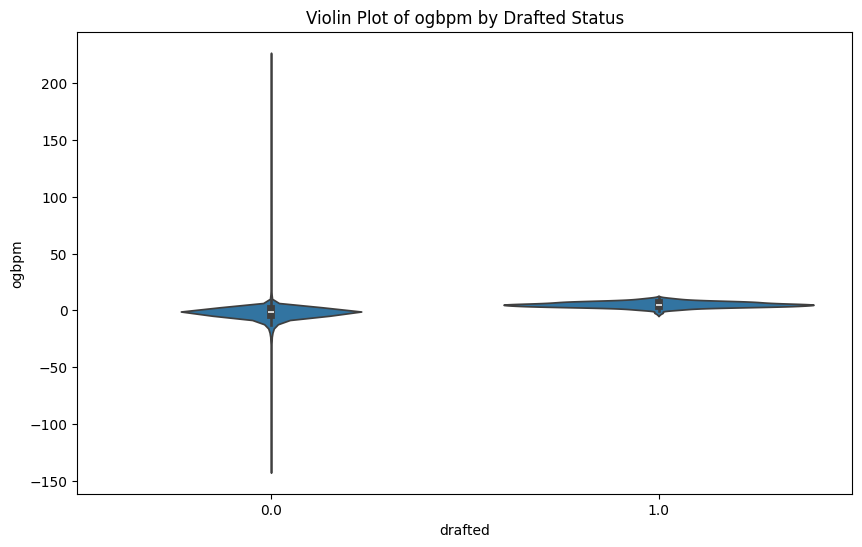

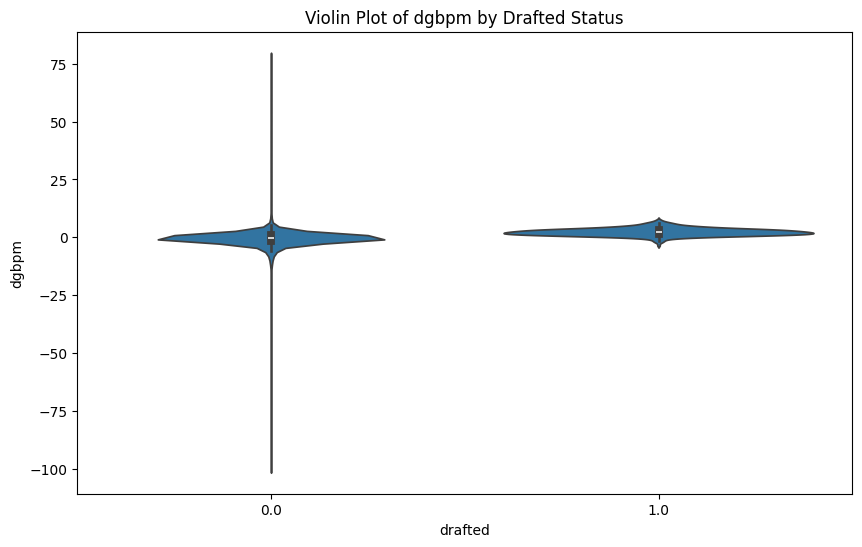

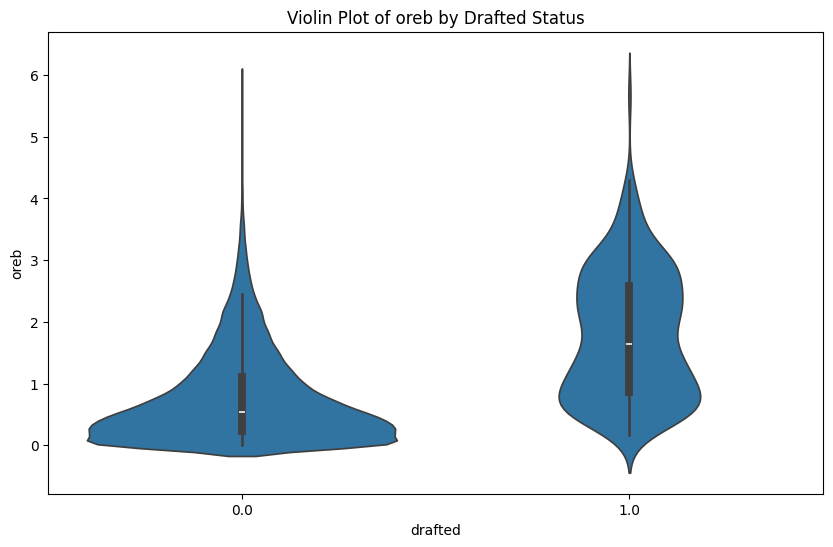

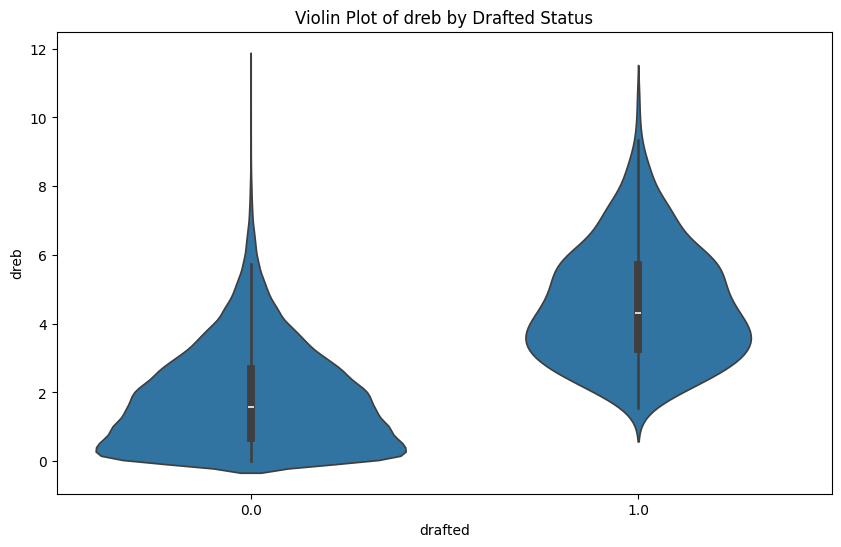

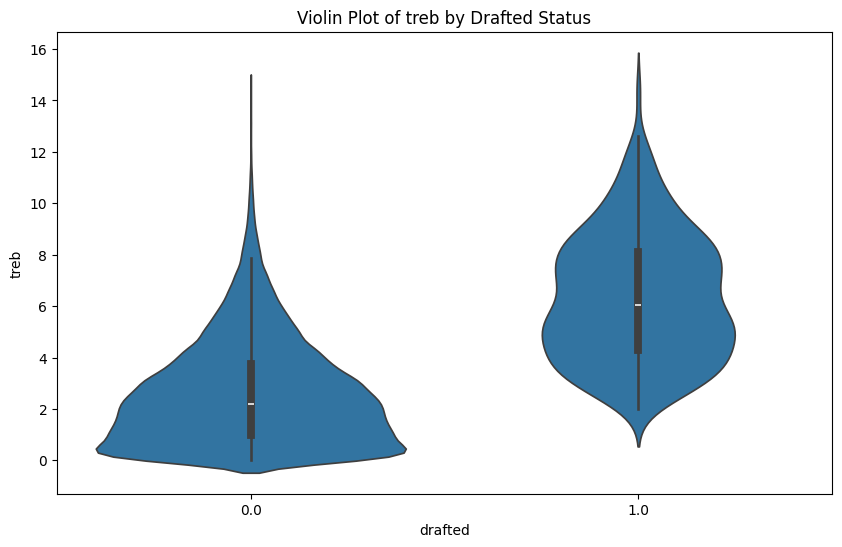

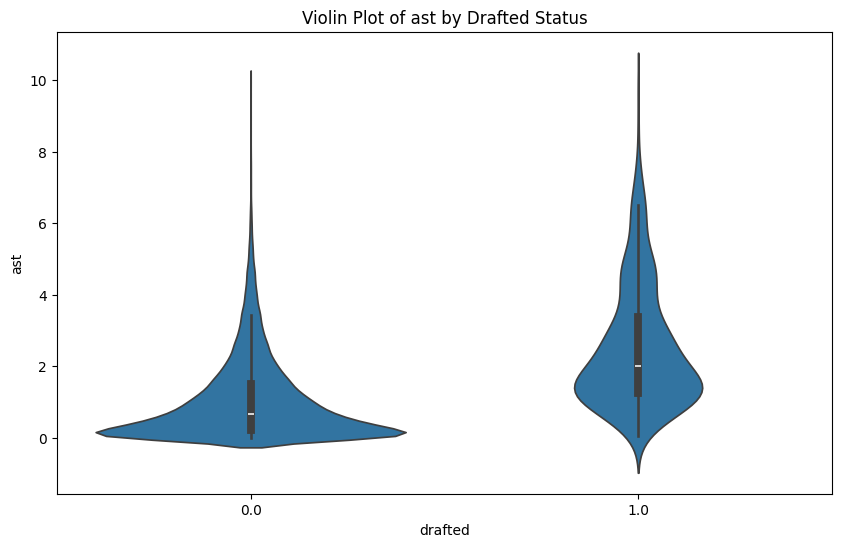

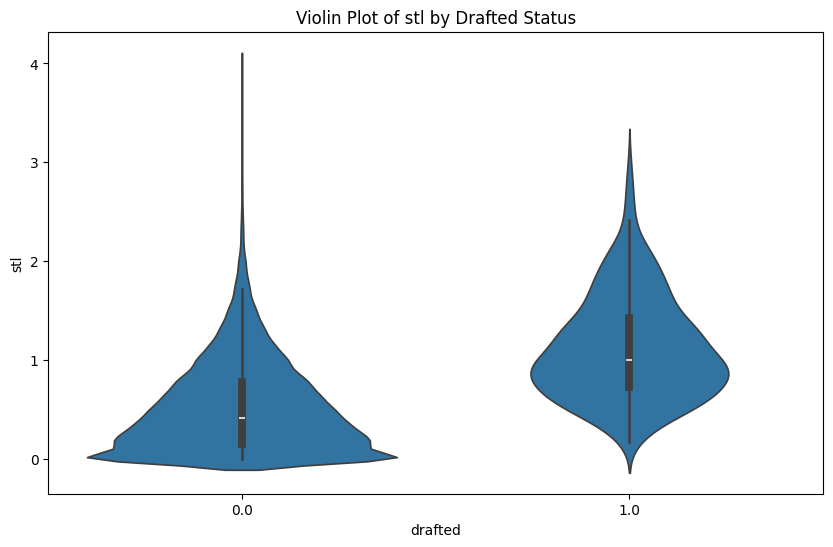

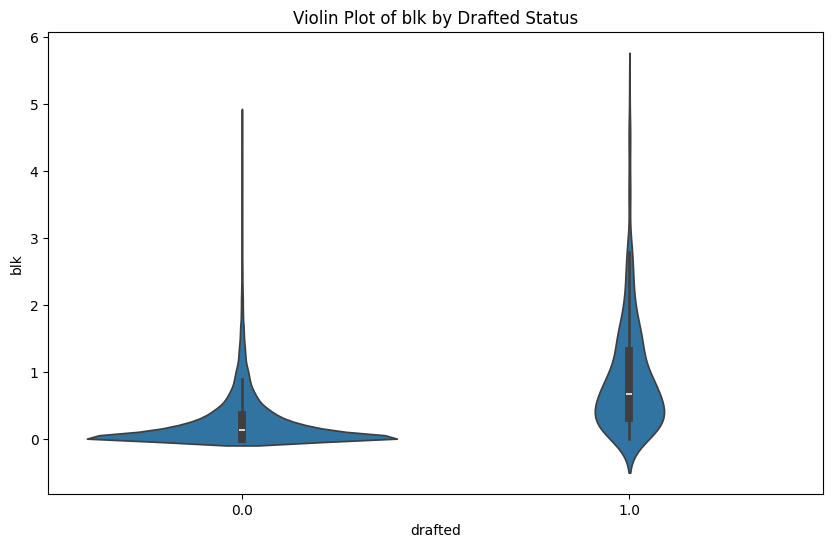

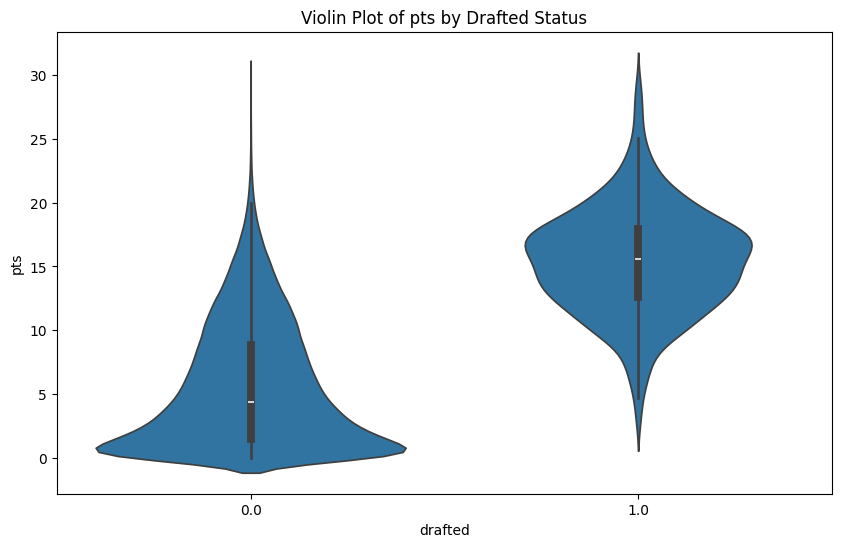

In [29]:
for col in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='drafted', y=col, data=df_cleaned)
    plt.title(f'Violin Plot of {col} by Drafted Status')
    plt.show()

Missing Values

In [26]:
missing_data = df_cleaned.isnull().sum()
print("Missing Values:\n", missing_data[missing_data > 0])

Missing Values:
 pick       45411
drtg          42
adrtg         42
dporpag       42
stops         42
bpm           42
obpm          42
dbpm          42
gbpm          42
mp            36
ogbpm         42
dgbpm         42
oreb          36
dreb          36
treb          36
ast           36
stl           36
blk           36
pts           36
dtype: int64


Missing Values Heatmap

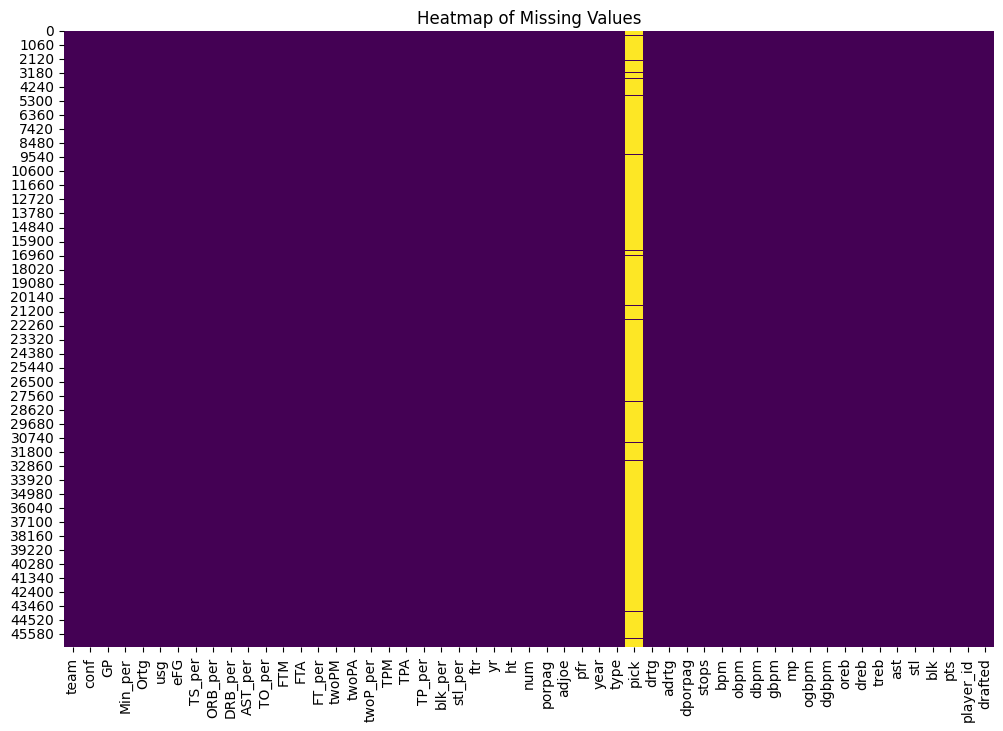

In [27]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()